In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\Sonali\Desktop\Flip Robo internship\Evaluation project phase\Datasets\Second Phase\temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
le=LabelEncoder()

In [8]:
df['Date']=le.fit_transform(df['Date'])

In [9]:
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
df.isnull().sum()

station              2
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

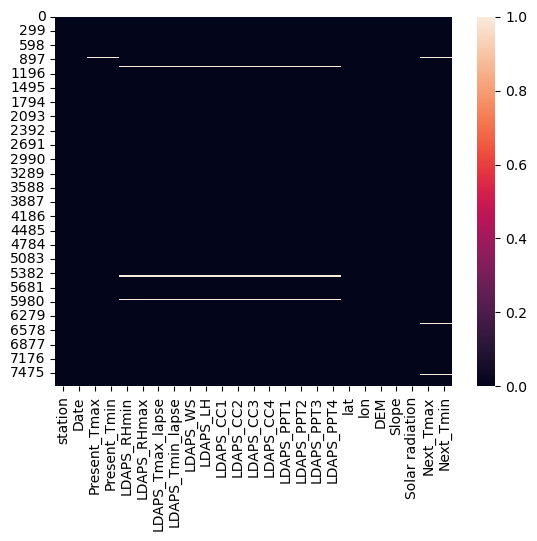

In [11]:
sns.heatmap(df.isnull())

The above heatmap shows that there are some values missing in the data. Now we will try to fill all the Nan values using fillna method.

In [12]:
df.fillna(df['station'].mean(),axis=1,inplace=True)

In [13]:
df.fillna(df['Date'].mean(),axis=1,inplace=True)

In [14]:
df.fillna(df['Present_Tmax'].mean(),axis=1,inplace=True)

In [15]:
df.fillna(df['Present_Tmin'].mean(),axis=1,inplace=True)

In [16]:
df.fillna(df['LDAPS_RHmin'].mean(),axis=1,inplace=True)

In [17]:
df.fillna(df['LDAPS_RHmax'].mean(),axis=1,inplace=True)

In [18]:
df.fillna(df['LDAPS_Tmax_lapse'].mean(),axis=1,inplace=True)

In [19]:
df.fillna(df['LDAPS_Tmin_lapse'].mean(),axis=1,inplace=True)

In [20]:
df.fillna(df['LDAPS_WS'].mean(),axis=1,inplace=True)

In [21]:
df.fillna(df['LDAPS_LH'].mean(),axis=1,inplace=True)

In [22]:
df.fillna(df['LDAPS_CC1'].mean(),axis=1,inplace=True)

In [23]:
df.fillna(df['LDAPS_CC2'].mean(),axis=1,inplace=True)

In [24]:
df.fillna(df['LDAPS_CC3'].mean(),axis=1,inplace=True)

In [25]:
df.fillna(df['LDAPS_CC4'].mean(),axis=1,inplace=True)

In [26]:
df.fillna(df['LDAPS_PPT1'].mean(),axis=1,inplace=True)

In [27]:
df.fillna(df['LDAPS_PPT2'].mean(),axis=1,inplace=True)

In [28]:
df.fillna(df['LDAPS_PPT3'].mean(),axis=1,inplace=True)

In [29]:
df.fillna(df['LDAPS_PPT4'].mean(),axis=1,inplace=True)

In [30]:
df.fillna(df['Next_Tmax'].mean(),axis=1,inplace=True)

In [31]:
df.fillna(df['Next_Tmin'].mean(),axis=1,inplace=True)

In [32]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

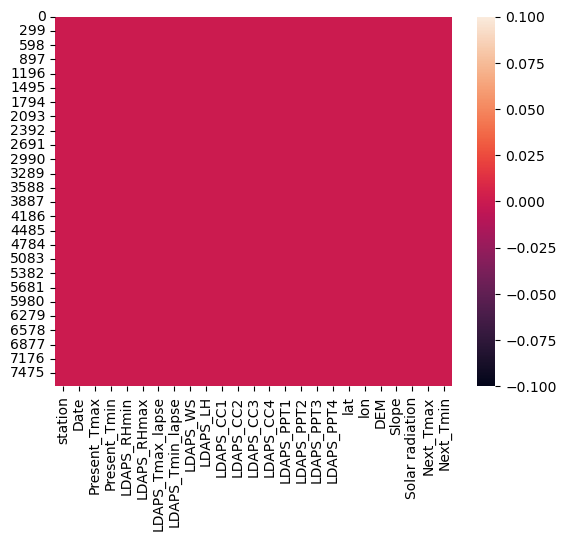

In [33]:
sns.heatmap(df.isnull())

The above heatmap shows that there are no null values present in the data now. We have filled all the Nan values.

In [34]:
df.nunique()

station               25
Date                 311
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
dtype: int64

In [35]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,304.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,310.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [36]:
df.dtypes

station             float64
Date                float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [37]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,154.540119,29.616796,23.132727,56.336004,87.645558,29.452713,23.410880,7.154977,62.026062,...,0.606084,0.401282,0.392575,37.544722,126.991397,61.867972,1.257048,5341.502803,30.214719,22.897626
std,7.210637,89.517900,3.355235,2.590419,15.212531,10.279415,3.353615,2.550772,2.248733,33.915011,...,2.139694,1.699300,1.730289,0.050352,0.079435,54.279780,1.370444,429.158867,3.284246,2.551294
min,1.000000,0.000000,13.000000,11.300000,13.000000,13.000000,13.000000,13.000000,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,13.000000,11.300000
25%,7.000000,77.000000,27.700000,21.600000,45.735368,84.038809,27.601014,22.032374,5.686487,36.776474,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,155.000000,29.900000,23.400000,54.828714,89.699505,29.662273,23.735942,6.563068,56.487289,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.092622,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,310.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


From the above description we can see that, in some featues mean is larger than median, which shows the presence of skewness.

We can also observe that, difference between 75% and max values is larger in almost all the features, which shows the presence of outliers in the data.

We can also see the values of min, standard deviation, 25% from the above description.

<AxesSubplot:>

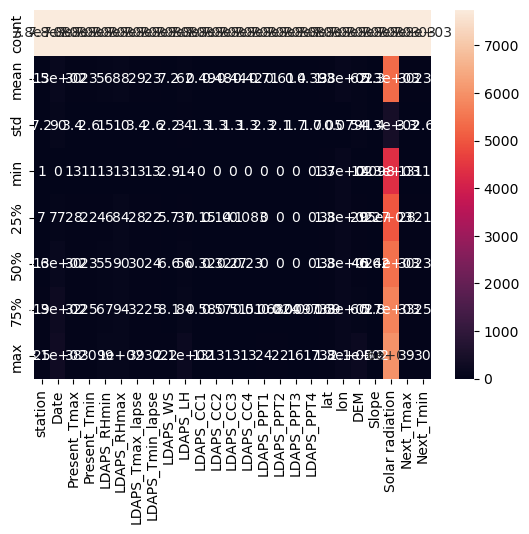

In [38]:
sns.heatmap(df.describe(),annot=True)

In [39]:
df.corr()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000e+00,2.569025e-17,0.107407,0.128550,-0.064033,-0.116264,0.060438,0.095854,0.005100,-0.131988,...,-0.006764,-0.008478,-0.007216,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.108596,0.129261
Date,2.569025e-17,1.000000e+00,-0.121197,-0.096951,-0.080766,-0.051159,-0.161112,-0.178390,-0.030184,-0.024183,...,0.022584,0.041359,0.013929,0.000052,-0.000061,0.000417,0.000452,-0.433311,-0.110961,-0.123628
Present_Tmax,1.074066e-01,-1.211973e-01,1.000000,0.682344,-0.197817,-0.238861,0.411348,0.473172,-0.087724,0.112216,...,-0.033893,-0.021294,-0.016090,-0.041325,0.011323,-0.162780,-0.084714,-0.026598,0.552202,0.560569
Present_Tmin,1.285502e-01,-9.695079e-02,0.682344,1.000000,0.072137,-0.097699,0.323693,0.598733,-0.002149,-0.022239,...,0.118125,0.057524,0.040520,-0.068820,-0.037652,-0.230507,-0.129022,0.046400,0.445886,0.738372
LDAPS_RHmin,-6.403288e-02,-8.076634e-02,-0.197817,0.072137,1.000000,0.589035,-0.337222,0.192161,0.200621,-0.027058,...,0.146345,-0.049258,-0.090578,0.083575,-0.073153,0.097990,0.118744,0.248340,-0.438486,0.059276
LDAPS_RHmax,-1.162643e-01,-5.115947e-02,-0.238861,-0.097699,0.589035,1.000000,0.120715,0.216867,-0.093357,0.266973,...,-0.280227,-0.462272,-0.460049,0.136328,0.017868,0.123372,0.152916,0.139960,-0.274453,-0.114456
LDAPS_Tmax_lapse,6.043754e-02,-1.611115e-01,0.411348,0.323693,-0.337222,0.120715,1.000000,0.719002,-0.388290,0.110849,...,-0.451260,-0.467325,-0.446506,-0.036811,0.079290,-0.156441,-0.141955,0.066298,0.635556,0.459845
LDAPS_Tmin_lapse,9.585439e-02,-1.783897e-01,0.473172,0.598733,0.192161,0.216867,0.719002,1.000000,-0.218643,-0.064395,...,-0.230340,-0.350807,-0.350654,-0.088074,-0.024433,-0.178833,-0.170042,0.166632,0.461981,0.747002
LDAPS_WS,5.099854e-03,-3.018430e-02,-0.087724,-0.002149,0.200621,-0.093357,-0.388290,-0.218643,1.000000,-0.030293,...,0.299146,0.294606,0.281648,0.035426,-0.057469,0.184633,0.165861,0.104773,-0.287557,-0.070040
LDAPS_LH,-1.319882e-01,-2.418336e-02,0.112216,-0.022239,-0.027058,0.266973,0.110849,-0.064395,-0.030293,1.000000,...,-0.144736,-0.093874,-0.089195,0.131854,0.025557,0.054571,0.085894,-0.039725,0.126069,-0.070184


<AxesSubplot:>

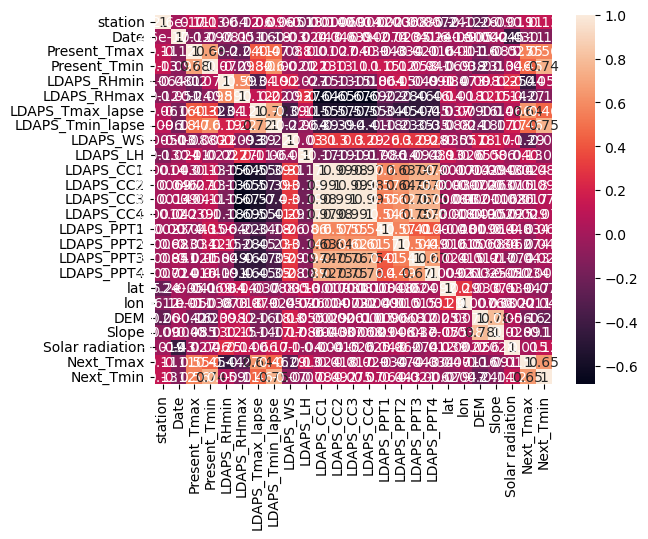

In [40]:
sns.heatmap(df.corr(),annot=True)

The above heatmap shows the correlation between all the features with other.

<AxesSubplot:xlabel='station', ylabel='Count'>

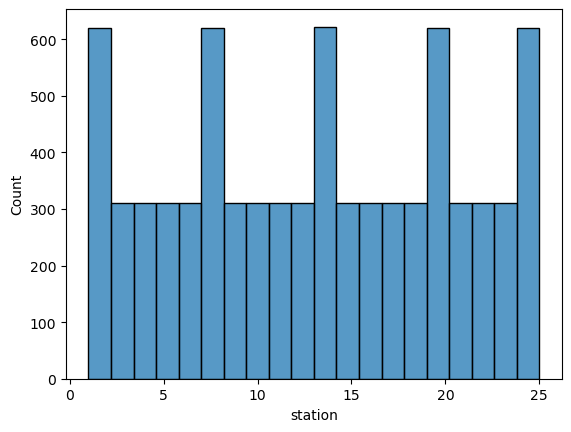

In [41]:
sns.histplot(df['station'])

<AxesSubplot:xlabel='Date', ylabel='Count'>

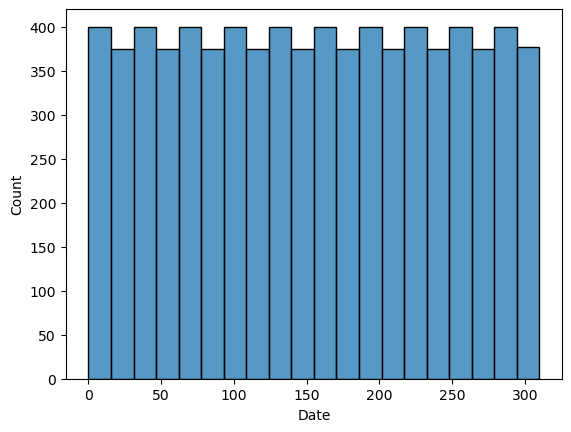

In [42]:
sns.histplot(df['Date'])

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

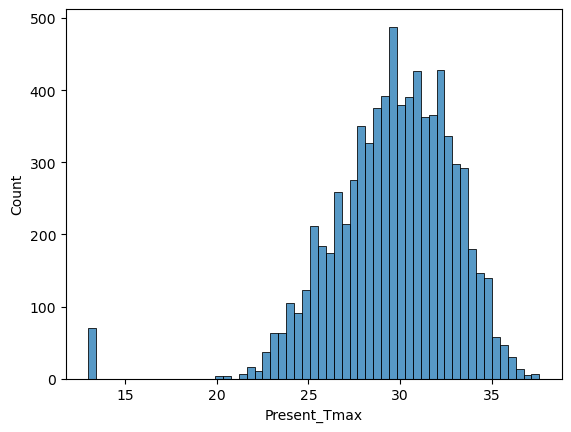

In [43]:
sns.histplot(df['Present_Tmax'])

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

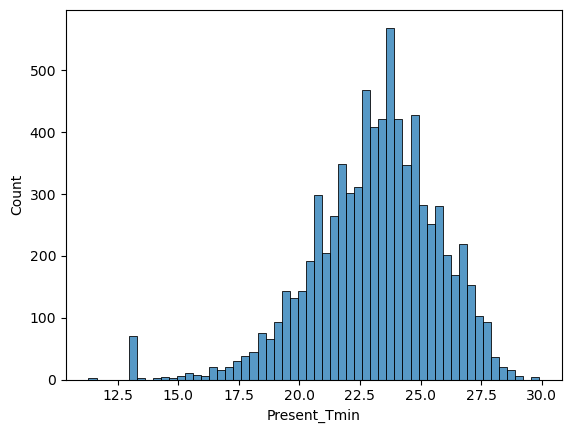

In [44]:
sns.histplot(df['Present_Tmin'])

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

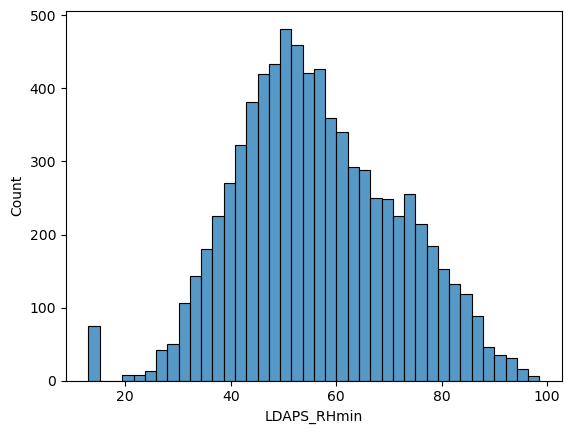

In [45]:
sns.histplot(df['LDAPS_RHmin'])

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

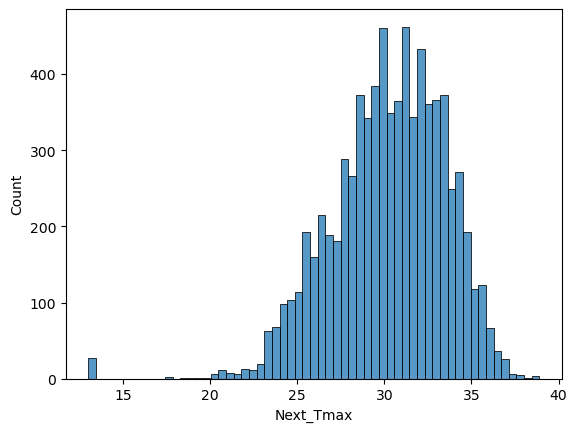

In [46]:
sns.histplot(df['Next_Tmax'])

<AxesSubplot:xlabel='station', ylabel='Density'>

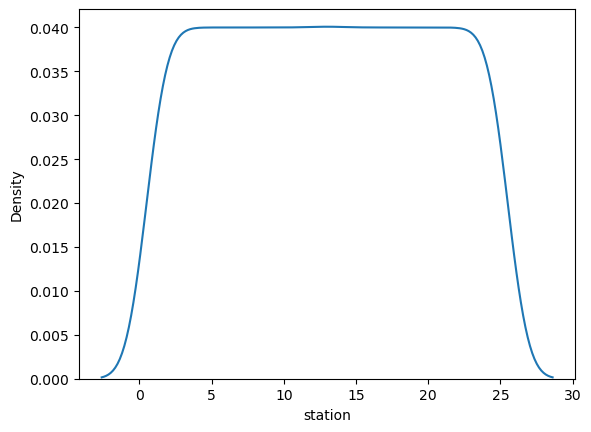

In [47]:
sns.distplot(df['station'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='station', ylabel='Density'>

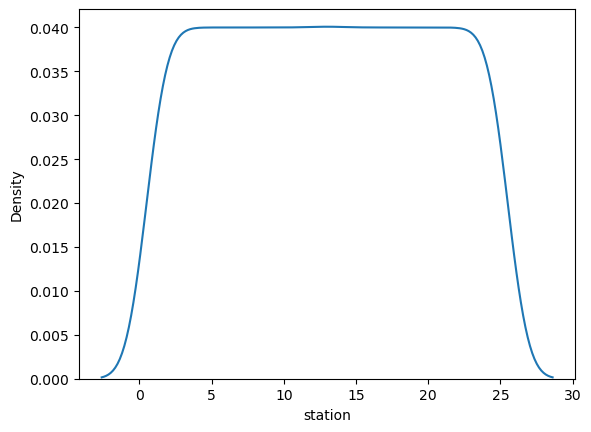

In [48]:
sns.distplot(df['station'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='Date', ylabel='Density'>

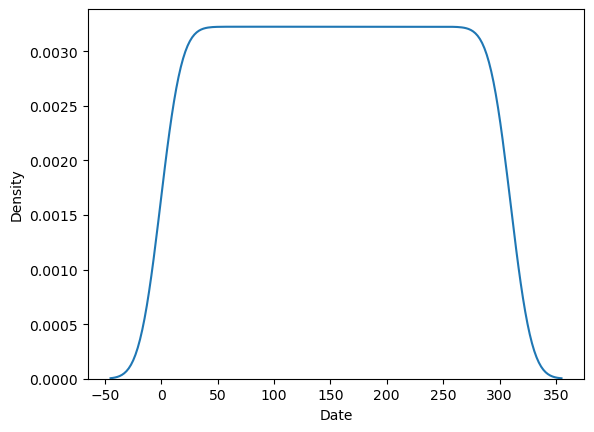

In [49]:
sns.distplot(df['Date'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='Date', ylabel='Density'>

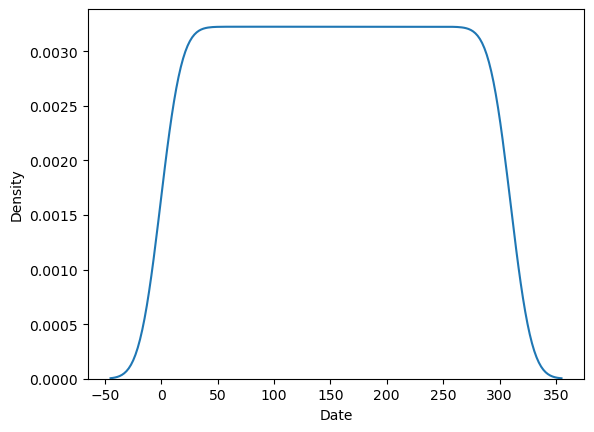

In [50]:
sns.distplot(df['Date'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

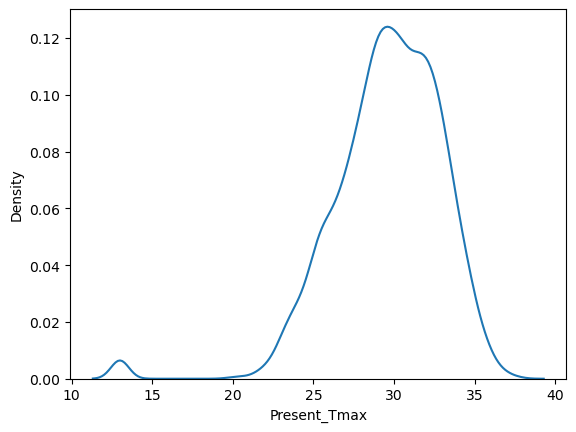

In [51]:
sns.distplot(df['Present_Tmax'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

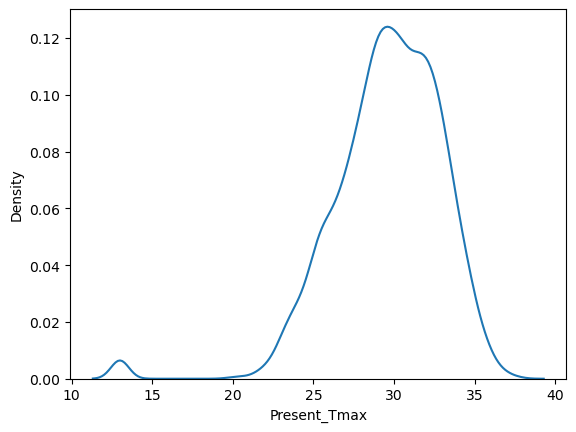

In [52]:
sns.distplot(df['Present_Tmax'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

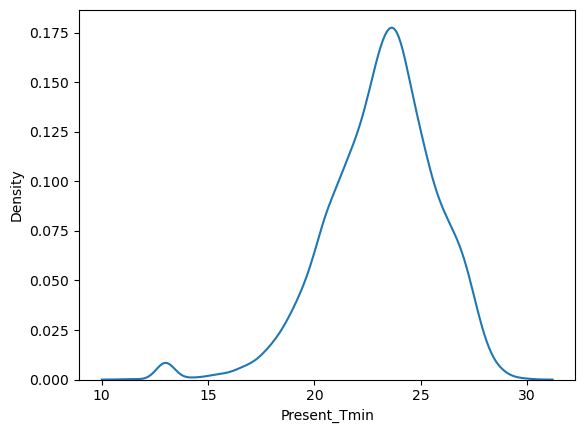

In [53]:
sns.distplot(df['Present_Tmin'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

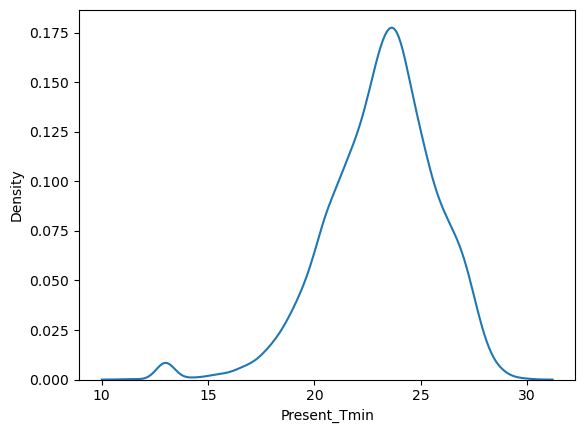

In [54]:
sns.distplot(df['Present_Tmin'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

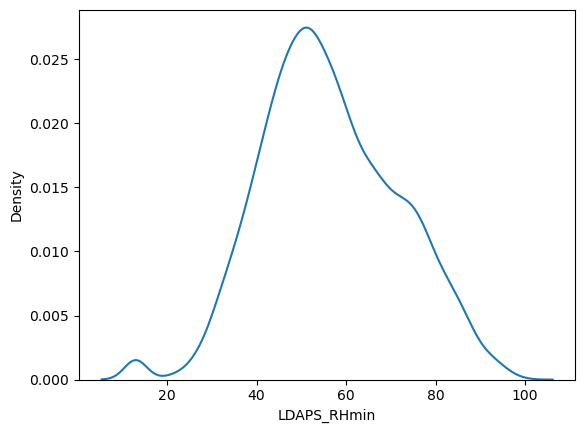

In [55]:
sns.distplot(df['LDAPS_RHmin'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

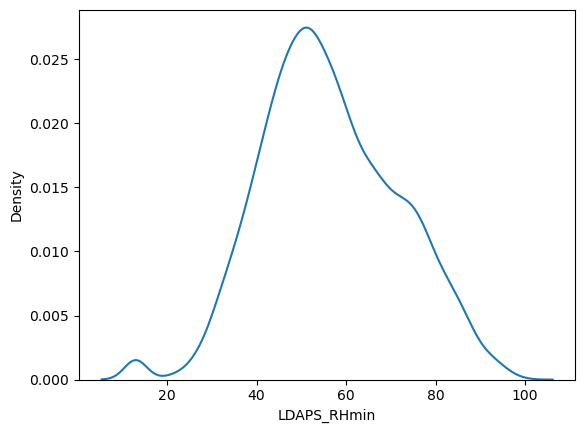

In [56]:
sns.distplot(df['LDAPS_RHmin'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

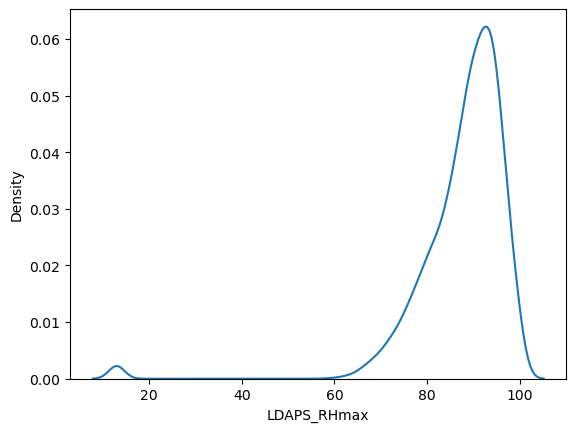

In [57]:
sns.distplot(df['LDAPS_RHmax'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

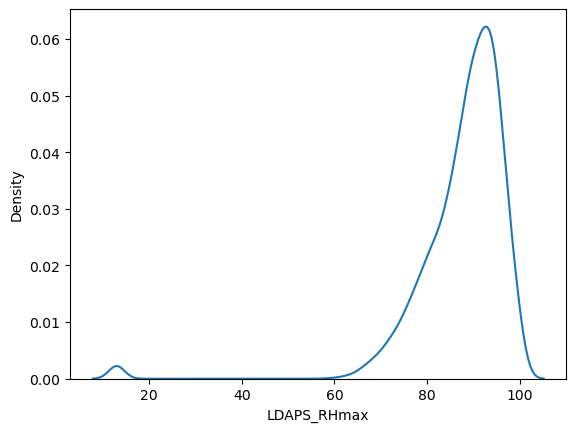

In [58]:
sns.distplot(df['LDAPS_RHmax'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

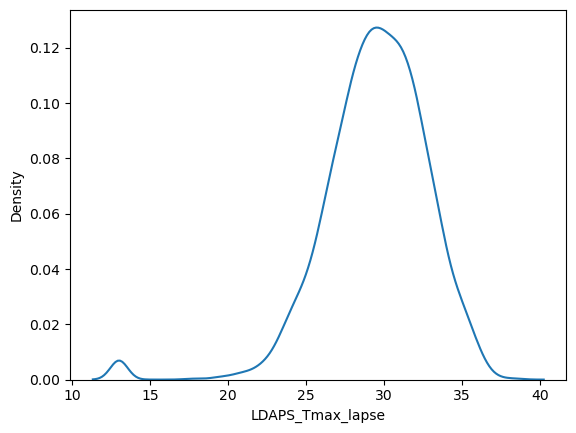

In [59]:
sns.distplot(df['LDAPS_Tmax_lapse'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

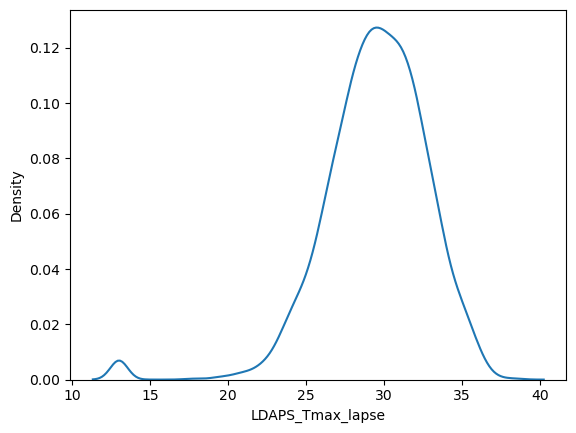

In [60]:
sns.distplot(df['LDAPS_Tmax_lapse'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

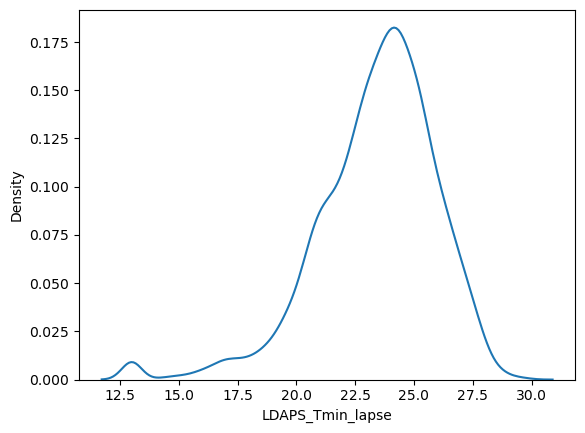

In [61]:
sns.distplot(df['LDAPS_Tmin_lapse'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

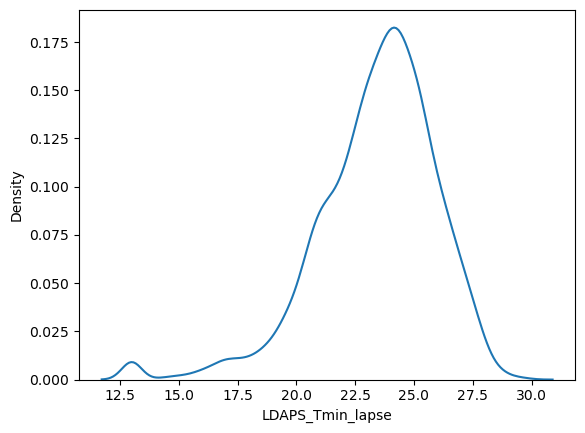

In [62]:
sns.distplot(df['LDAPS_Tmin_lapse'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

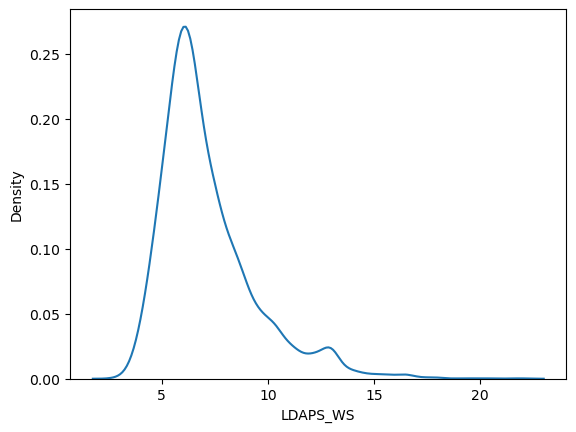

In [63]:
sns.distplot(df['LDAPS_WS'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

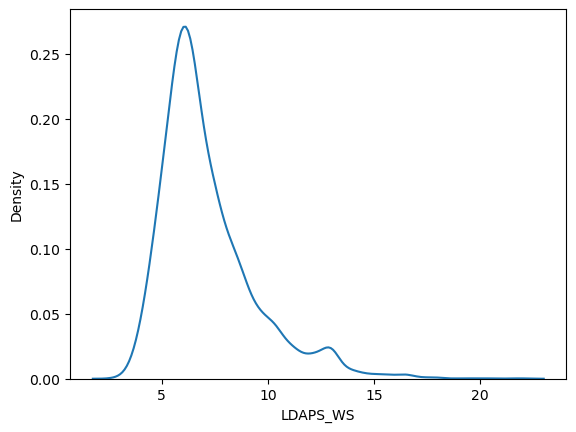

In [64]:
sns.distplot(df['LDAPS_WS'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

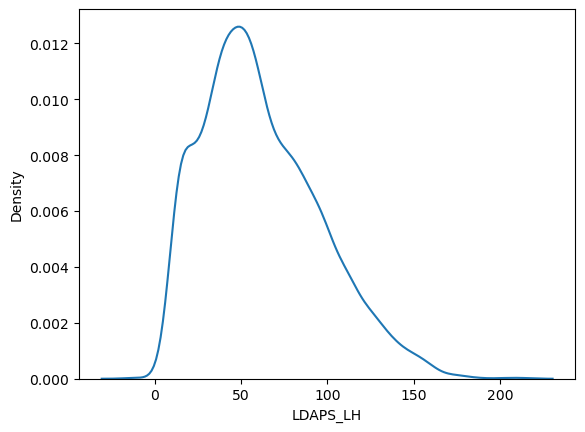

In [65]:
sns.distplot(df['LDAPS_LH'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

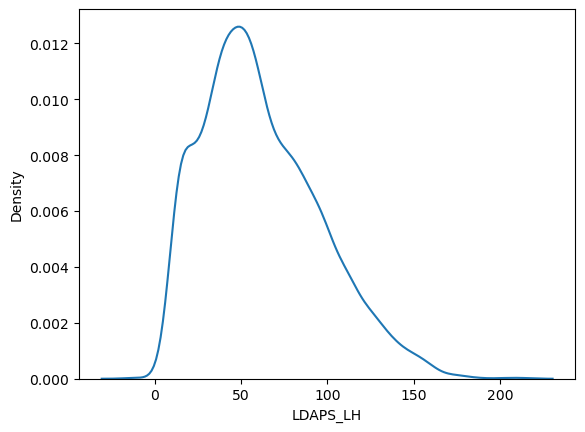

In [66]:
sns.distplot(df['LDAPS_LH'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

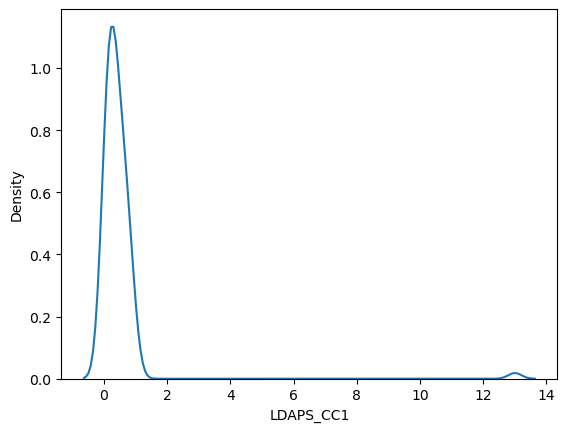

In [67]:
sns.distplot(df['LDAPS_CC1'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

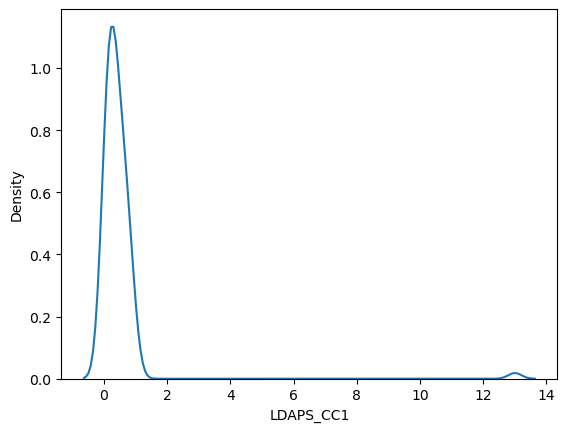

In [68]:
sns.distplot(df['LDAPS_CC1'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

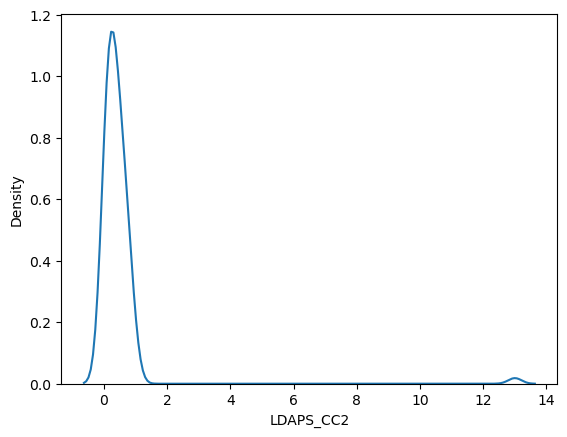

In [69]:
sns.distplot(df['LDAPS_CC2'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

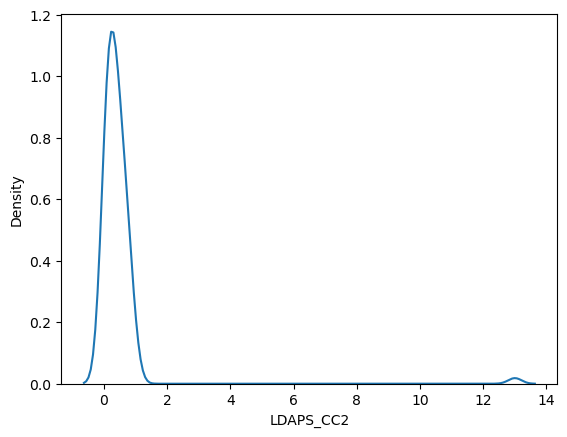

In [70]:
sns.distplot(df['LDAPS_CC2'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

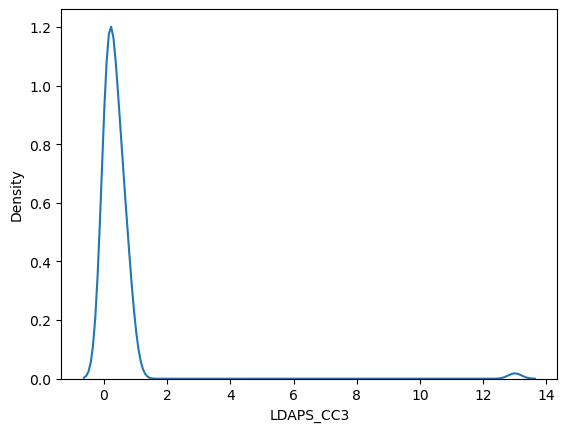

In [71]:
sns.distplot(df['LDAPS_CC3'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

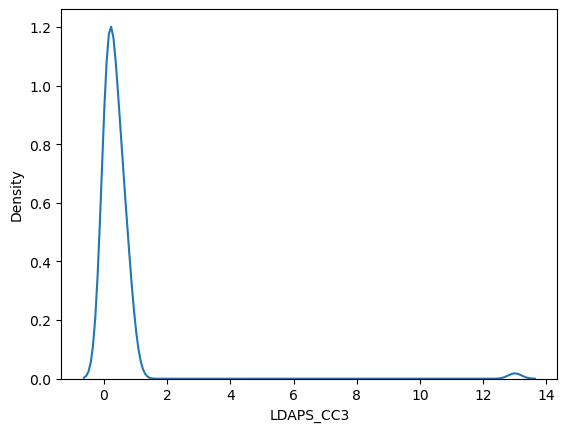

In [72]:
sns.distplot(df['LDAPS_CC3'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

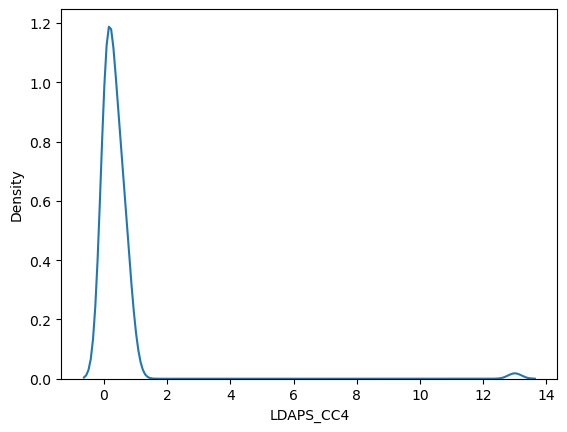

In [73]:
sns.distplot(df['LDAPS_CC4'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

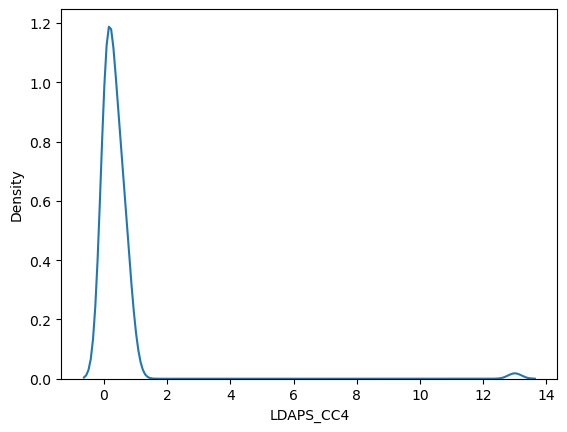

In [74]:
sns.distplot(df['LDAPS_CC4'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

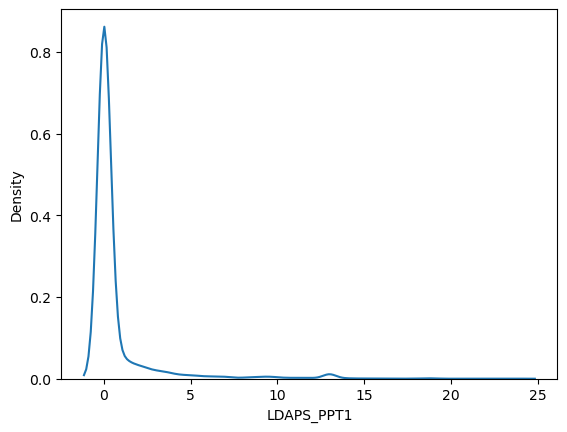

In [75]:
sns.distplot(df['LDAPS_PPT1'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

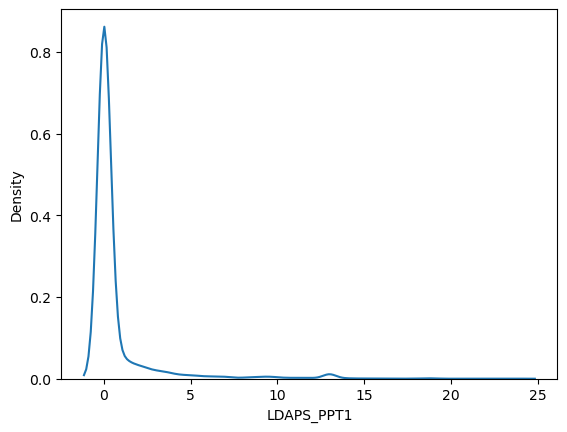

In [76]:
sns.distplot(df['LDAPS_PPT1'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

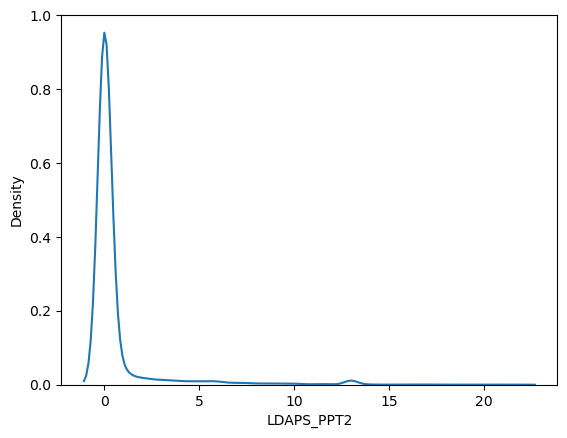

In [77]:
sns.distplot(df['LDAPS_PPT2'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

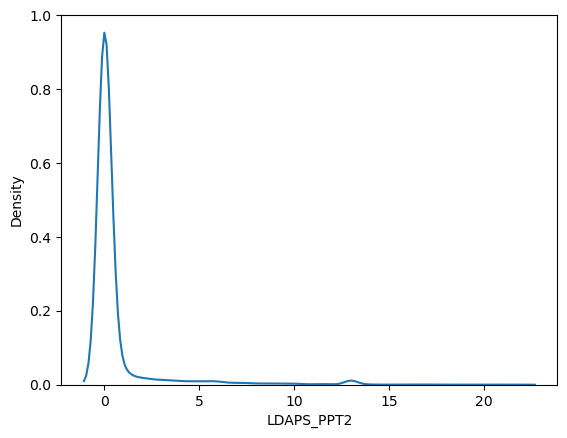

In [78]:
sns.distplot(df['LDAPS_PPT2'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

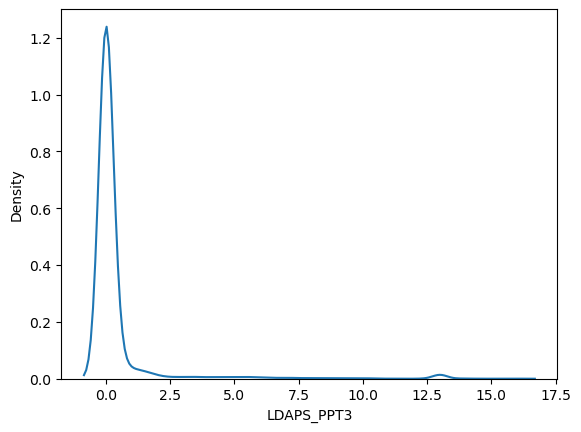

In [79]:
sns.distplot(df['LDAPS_PPT3'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

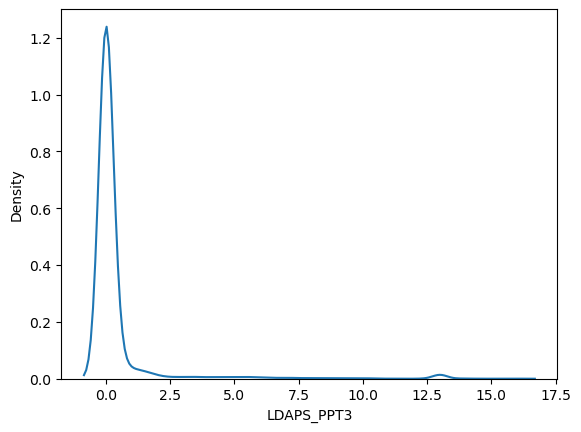

In [80]:
sns.distplot(df['LDAPS_PPT3'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

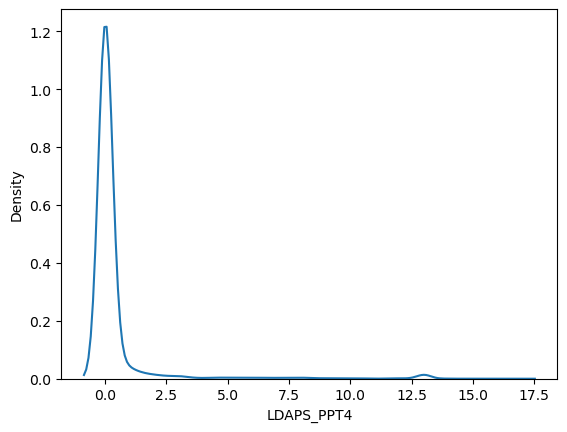

In [81]:
sns.distplot(df['LDAPS_PPT4'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

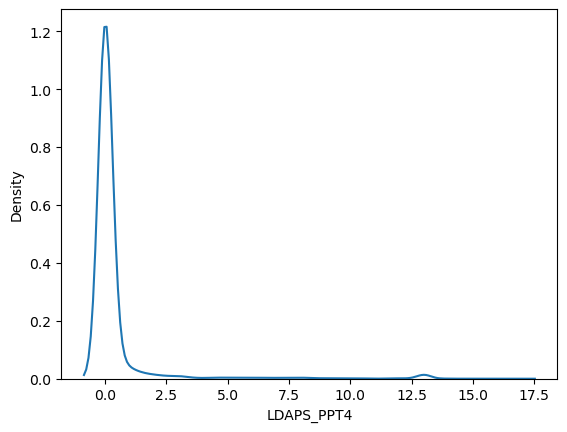

In [82]:
sns.distplot(df['LDAPS_PPT4'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='lat', ylabel='Density'>

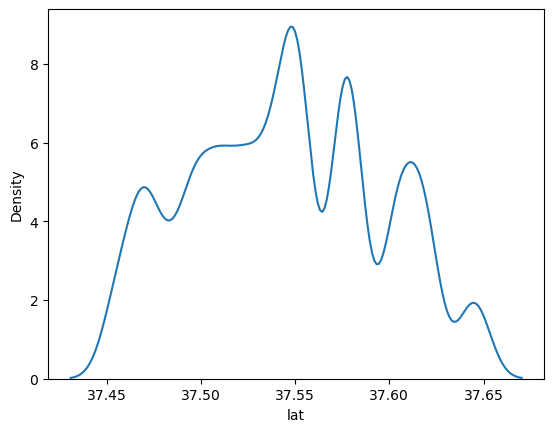

In [83]:
sns.distplot(df['lat'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='lat', ylabel='Density'>

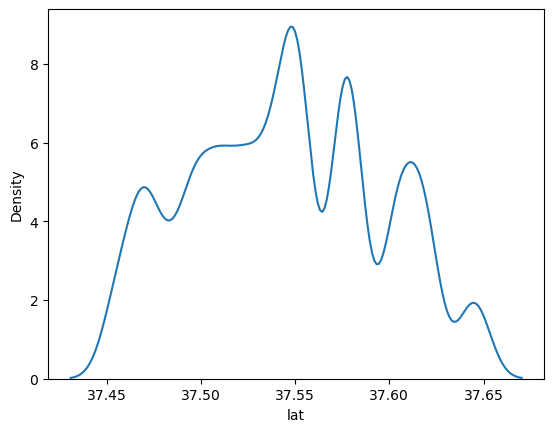

In [84]:
sns.distplot(df['lat'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='lon', ylabel='Density'>

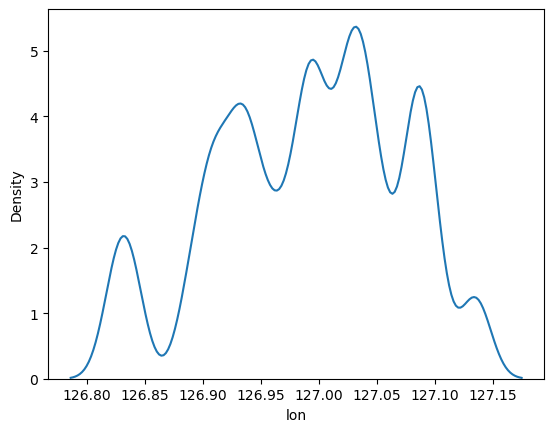

In [85]:
sns.distplot(df['lon'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='lon', ylabel='Density'>

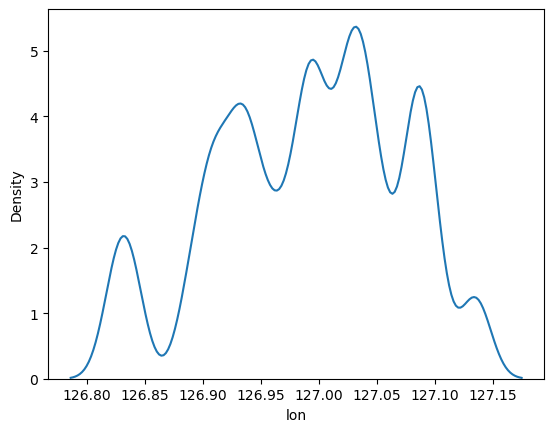

In [86]:
sns.distplot(df['lon'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='DEM', ylabel='Density'>

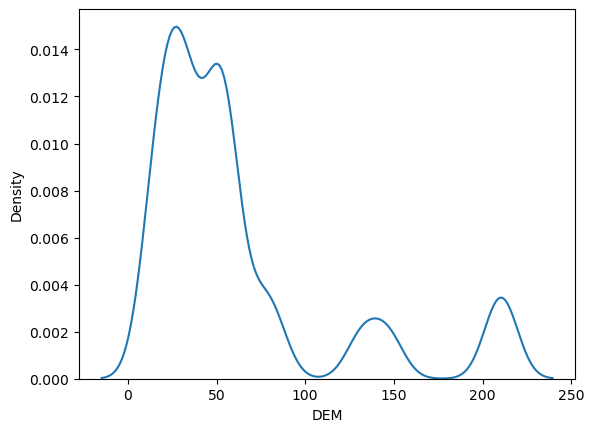

In [87]:
sns.distplot(df['DEM'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='DEM', ylabel='Density'>

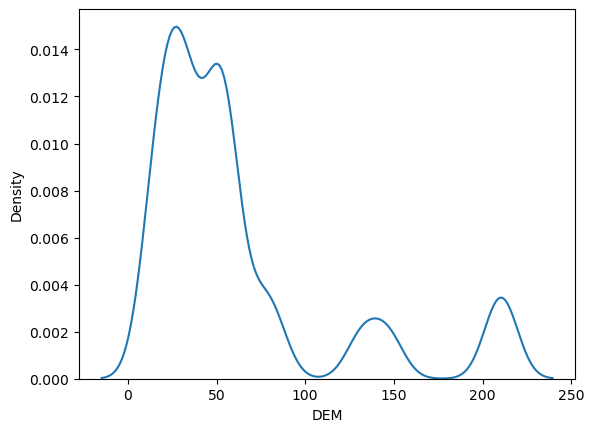

In [88]:
sns.distplot(df['DEM'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='Slope', ylabel='Density'>

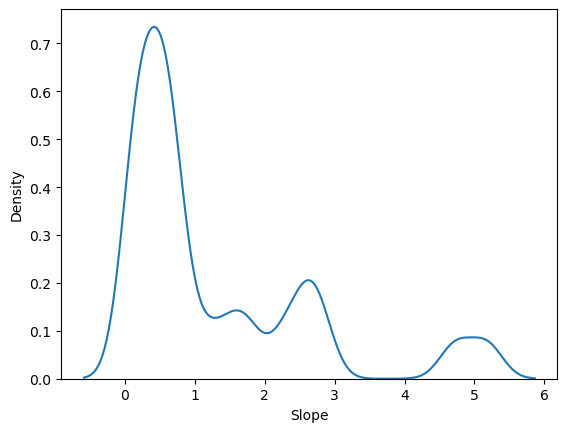

In [89]:
sns.distplot(df['Slope'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='Slope', ylabel='Density'>

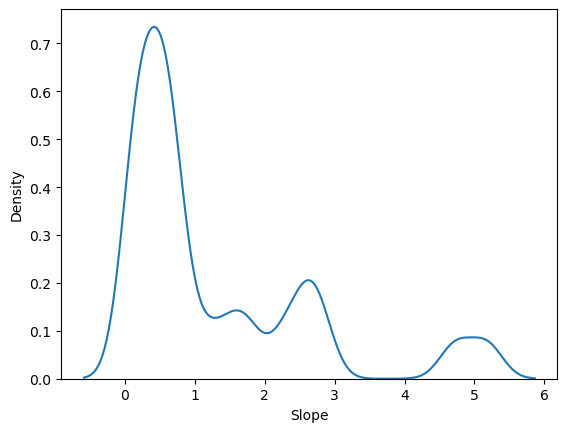

In [90]:
sns.distplot(df['Slope'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

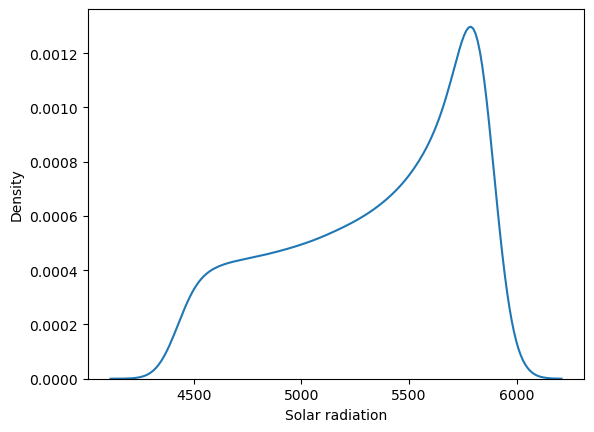

In [91]:
sns.distplot(df['Solar radiation'],df['Next_Tmax'],'bins'==10)

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

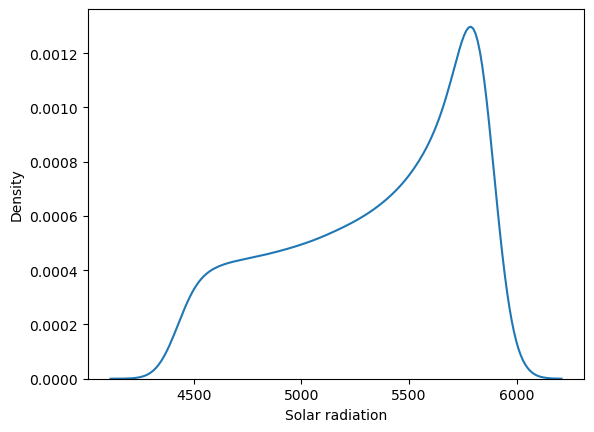

In [92]:
sns.distplot(df['Solar radiation'],df['Next_Tmin'],'bins'==10)

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

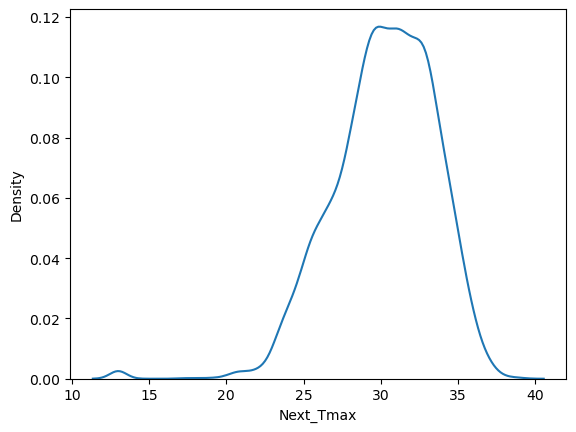

In [93]:
sns.distplot(df['Next_Tmax'],df['Next_Tmin'],'bins'==10)

Above all the distribution plots shows the presence of skewness in the data.



In [94]:
df.skew()

station             0.000000
Date                0.000008
Present_Tmax       -1.172785
Present_Tmin       -0.741976
LDAPS_RHmin         0.118395
LDAPS_RHmax        -3.891182
LDAPS_Tmax_lapse   -1.185163
LDAPS_Tmin_lapse   -1.003492
LDAPS_WS            1.524253
LDAPS_LH            0.665508
LDAPS_CC1           9.376967
LDAPS_CC2           9.398463
LDAPS_CC3           9.437718
LDAPS_CC4           9.421953
LDAPS_PPT1          4.669487
LDAPS_PPT2          4.949429
LDAPS_PPT3          5.877200
LDAPS_PPT4          5.919717
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.744463
Next_Tmin          -0.537841
dtype: float64

In [95]:
df['LDAPS_WS']=np.sqrt(df['LDAPS_WS'])

In [96]:
df['LDAPS_CC1']=np.cbrt(df['LDAPS_CC1'])

In [97]:
df['LDAPS_CC2']=np.cbrt(df['LDAPS_CC1'])

In [98]:
df['LDAPS_CC3']=np.cbrt(df['LDAPS_CC3'])

In [99]:
df['LDAPS_CC4']=np.cbrt(df['LDAPS_CC4'])

In [100]:
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])

In [101]:
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])

In [102]:
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])

In [103]:
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [104]:
df['DEM']=np.sqrt(df['DEM'])

In [105]:
df['Slope']=np.sqrt(df['Slope'])

In [106]:
df.skew()

station             0.000000
Date                0.000008
Present_Tmax       -1.172785
Present_Tmin       -0.741976
LDAPS_RHmin         0.118395
LDAPS_RHmax        -3.891182
LDAPS_Tmax_lapse   -1.185163
LDAPS_Tmin_lapse   -1.003492
LDAPS_WS            1.031932
LDAPS_LH            0.665508
LDAPS_CC1           1.865334
LDAPS_CC2          -2.628080
LDAPS_CC3           1.873920
LDAPS_CC4           1.706480
LDAPS_PPT1          1.960558
LDAPS_PPT2          2.262584
LDAPS_PPT3          2.687614
LDAPS_PPT4          2.912330
lat                 0.087062
lon                -0.285213
DEM                 1.152438
Slope               0.871432
Solar radiation    -0.511210
Next_Tmax          -0.744463
Next_Tmin          -0.537841
dtype: float64

In [107]:
df['LDAPS_WS']=np.cbrt(df['LDAPS_WS'])

In [108]:
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])

In [109]:
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])

In [110]:
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [111]:
df.skew()

station             0.000000
Date                0.000008
Present_Tmax       -1.172785
Present_Tmin       -0.741976
LDAPS_RHmin         0.118395
LDAPS_RHmax        -3.891182
LDAPS_Tmax_lapse   -1.185163
LDAPS_Tmin_lapse   -1.003492
LDAPS_WS            0.732141
LDAPS_LH            0.665508
LDAPS_CC1           1.865334
LDAPS_CC2          -2.628080
LDAPS_CC3           1.873920
LDAPS_CC4           1.706480
LDAPS_PPT1          1.960558
LDAPS_PPT2          1.041554
LDAPS_PPT3          1.141989
LDAPS_PPT4          1.453570
lat                 0.087062
lon                -0.285213
DEM                 1.152438
Slope               0.871432
Solar radiation    -0.511210
Next_Tmax          -0.744463
Next_Tmin          -0.537841
dtype: float64

Now we will check for the presence of outliers in the data with the help of zscore and IQR methods.

<AxesSubplot:>

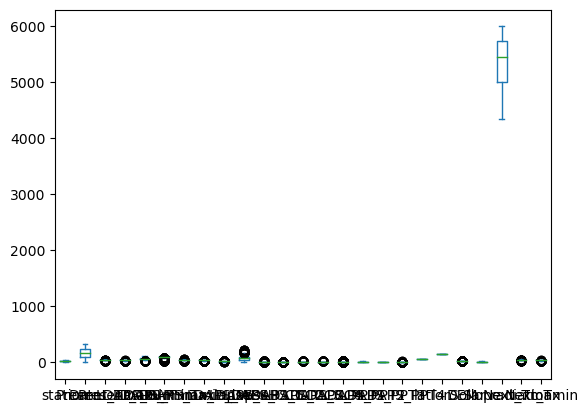

In [112]:
df.plot.box()

<AxesSubplot:>

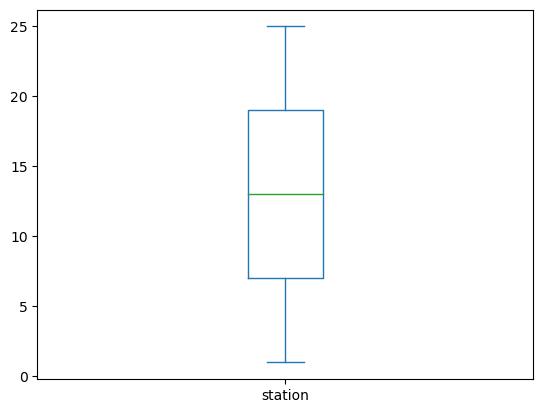

In [113]:
df['station'].plot.box()

<AxesSubplot:>

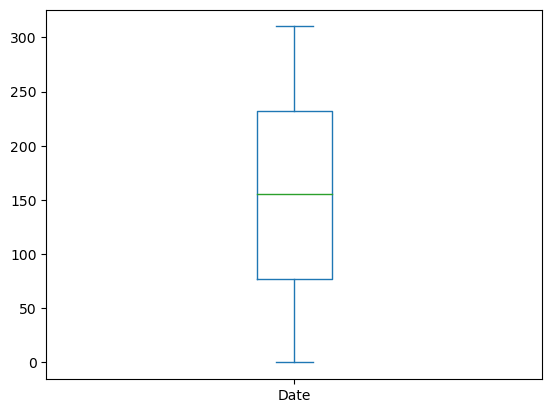

In [114]:
df['Date'].plot.box()

<AxesSubplot:>

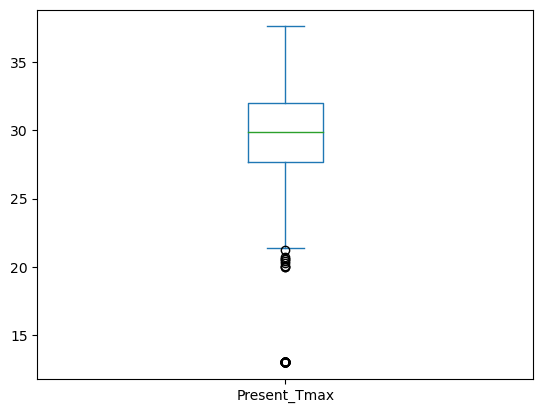

In [115]:
df['Present_Tmax'].plot.box()

<AxesSubplot:>

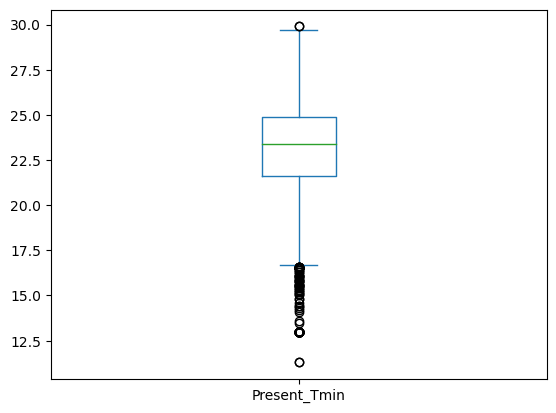

In [116]:
df['Present_Tmin'].plot.box()

<AxesSubplot:>

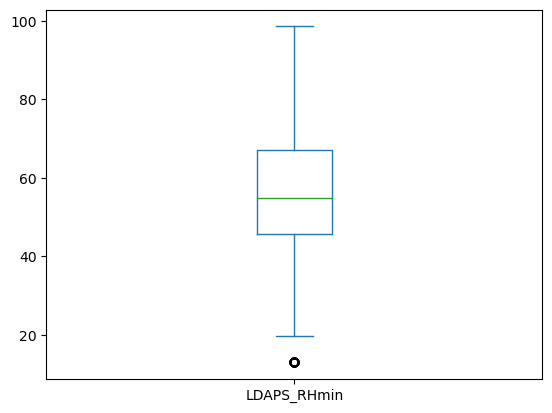

In [117]:
df['LDAPS_RHmin'].plot.box()

<AxesSubplot:>

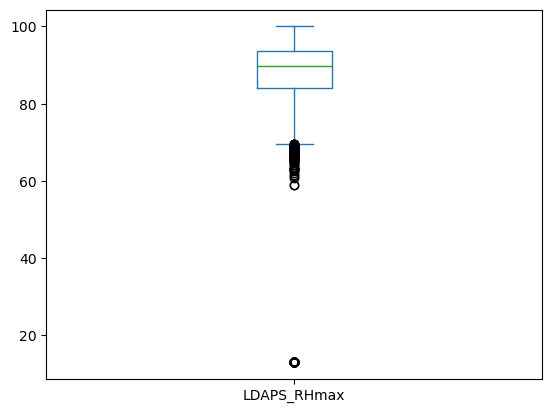

In [118]:
df['LDAPS_RHmax'].plot.box()

<AxesSubplot:>

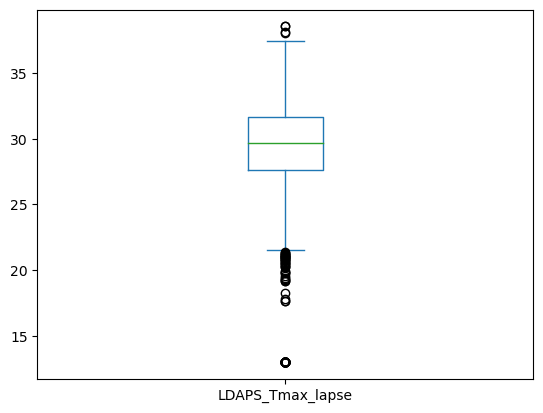

In [119]:
df['LDAPS_Tmax_lapse'].plot.box()

<AxesSubplot:>

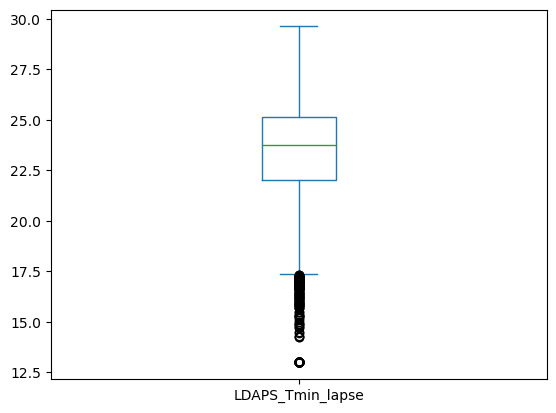

In [120]:
df['LDAPS_Tmin_lapse'].plot.box()

<AxesSubplot:>

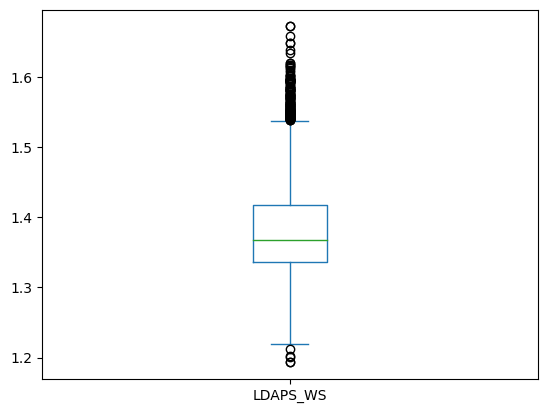

In [121]:
df['LDAPS_WS'].plot.box()

<AxesSubplot:>

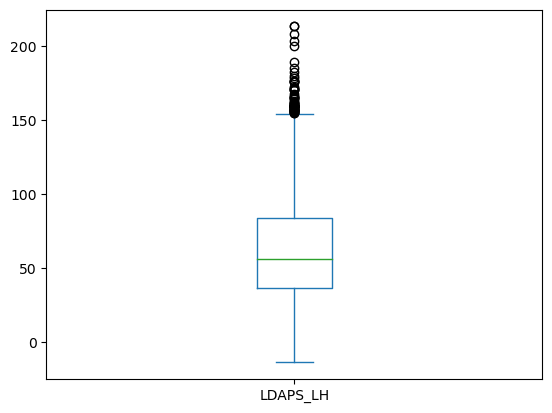

In [122]:
df['LDAPS_LH'].plot.box()

<AxesSubplot:>

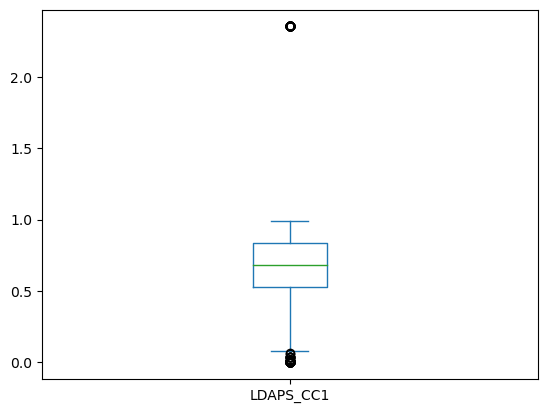

In [123]:
df['LDAPS_CC1'].plot.box()

<AxesSubplot:>

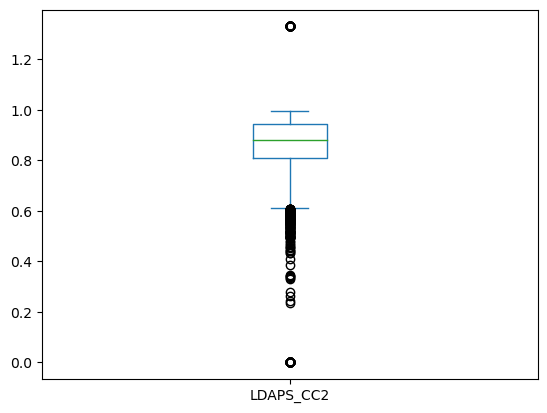

In [124]:
df['LDAPS_CC2'].plot.box()

<AxesSubplot:>

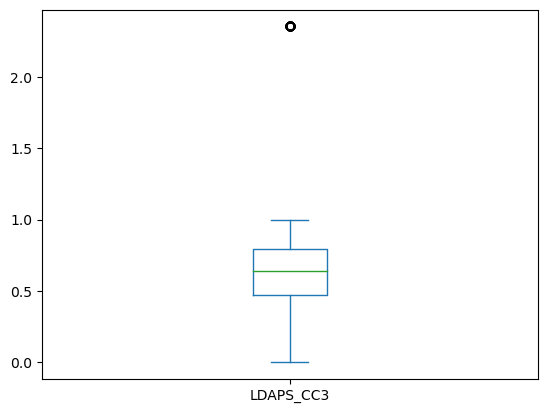

In [125]:
df['LDAPS_CC3'].plot.box()

<AxesSubplot:>

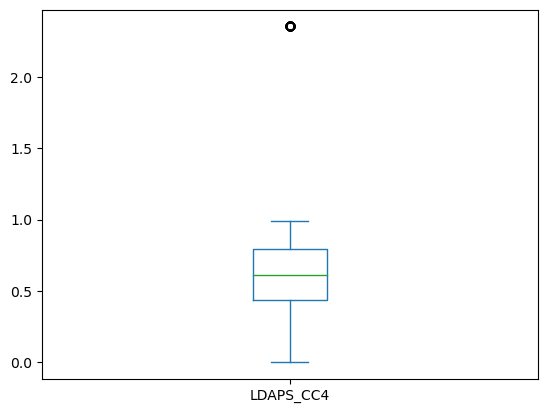

In [126]:
df['LDAPS_CC4'].plot.box()

<AxesSubplot:>

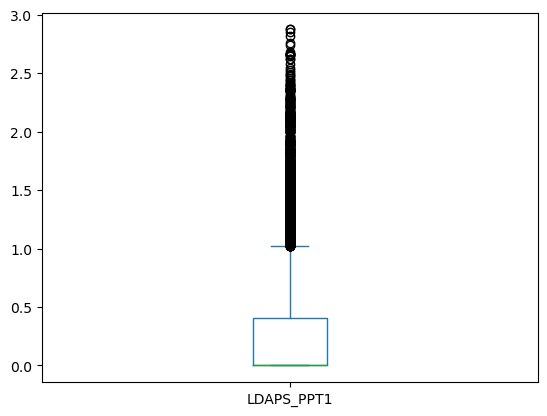

In [127]:
df['LDAPS_PPT1'].plot.box()

<AxesSubplot:>

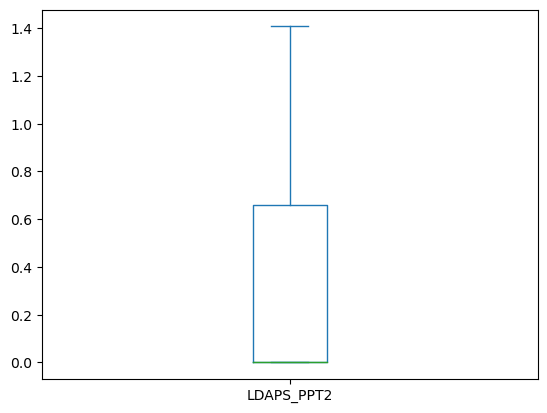

In [128]:
df['LDAPS_PPT2'].plot.box()

<AxesSubplot:>

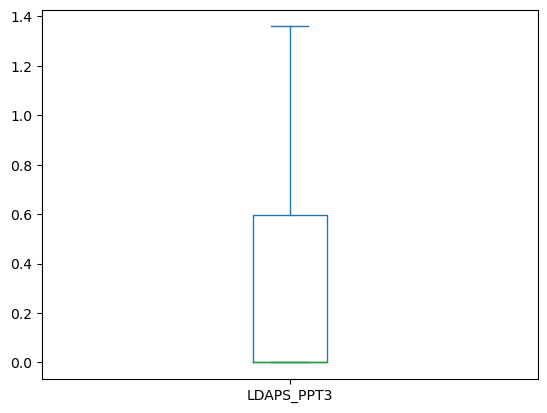

In [129]:
df['LDAPS_PPT3'].plot.box()

<AxesSubplot:>

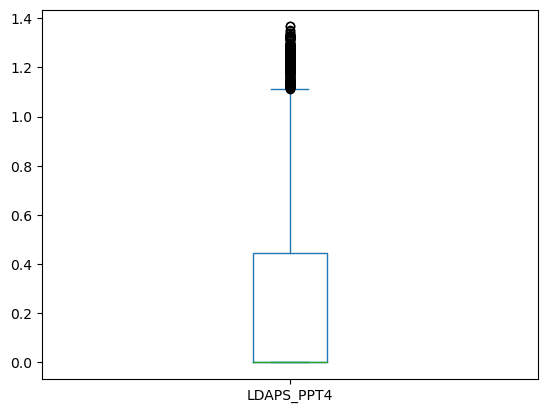

In [130]:
df['LDAPS_PPT4'].plot.box()

<AxesSubplot:>

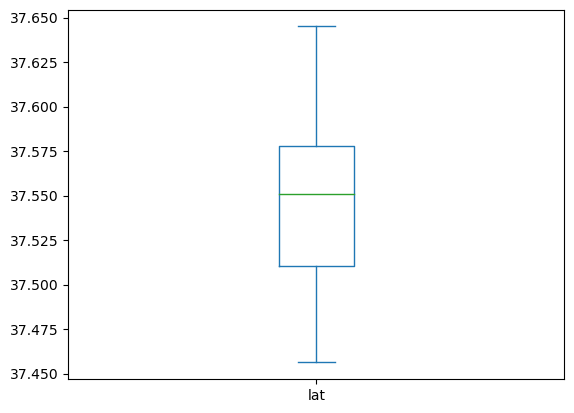

In [131]:
df['lat'].plot.box()

<AxesSubplot:>

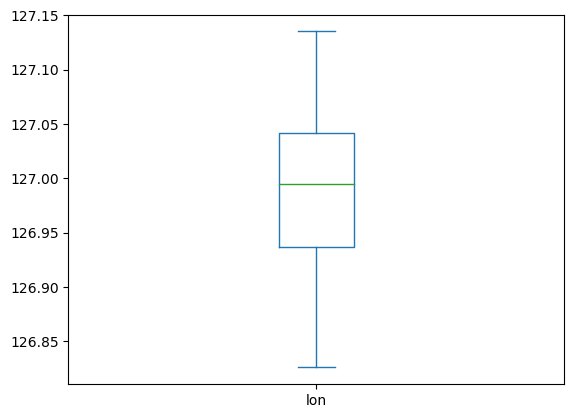

In [132]:
df['lon'].plot.box()

<AxesSubplot:>

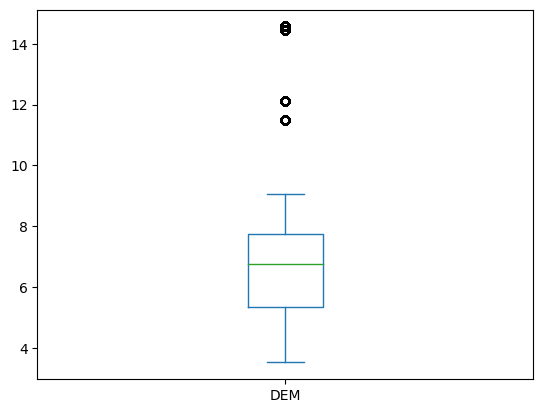

In [133]:
df['DEM'].plot.box()

<AxesSubplot:>

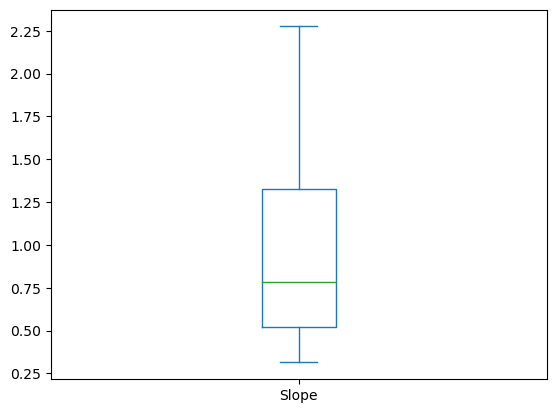

In [134]:
df['Slope'].plot.box()

<AxesSubplot:>

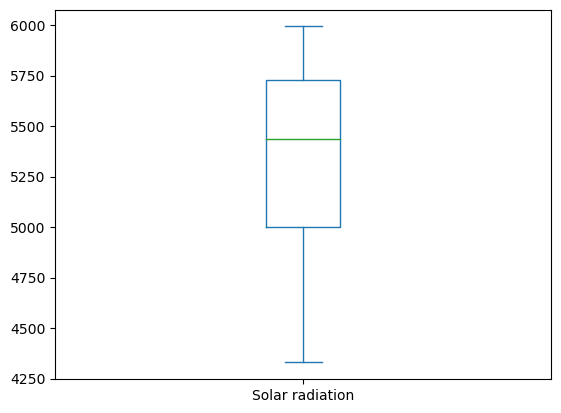

In [135]:
df['Solar radiation'].plot.box()

<AxesSubplot:>

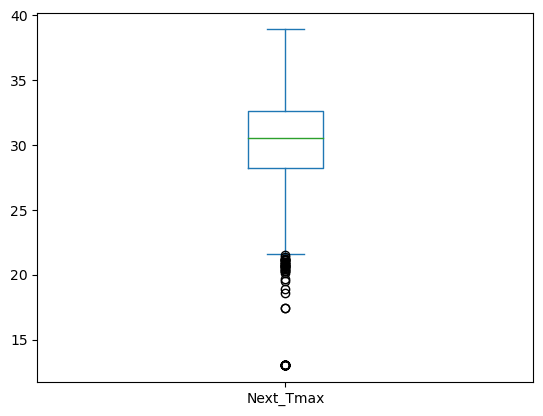

In [136]:
df['Next_Tmax'].plot.box()

<AxesSubplot:>

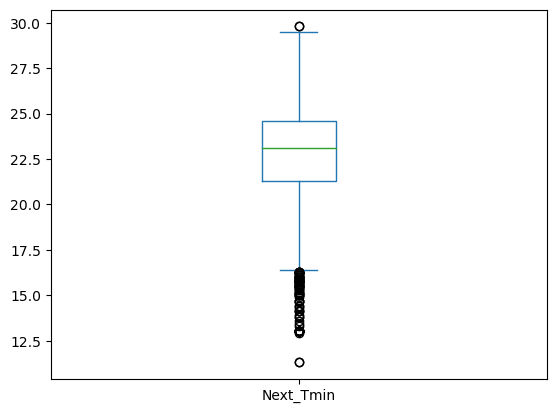

In [137]:
df['Next_Tmin'].plot.box()

The above boxplots shows the presence of outliers in the data.

In [138]:
from scipy.stats import zscore
outliers=df[['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]
z=np.abs(zscore(outliers))
z

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.664315,1.513313,0.273261,0.668941,0.126199,0.337668,0.411109,0.158372,0.043362,0.218966,...,0.668669,0.642462,0.558439,1.189286,0.005000,2.455539,1.259127,1.517935,0.339436,0.665441
1,1.525622,1.513313,0.680534,0.591729,0.267731,0.287891,0.118678,0.244698,0.661576,0.297487,...,0.668669,0.642462,0.558439,1.189286,0.511177,0.200077,0.474620,1.229950,0.086869,0.155863
2,1.386929,1.513313,0.591116,0.064578,0.502613,0.357239,0.190427,0.452736,0.405494,1.222340,...,0.668669,0.642462,0.558439,0.653021,0.838510,0.509827,0.841031,1.216534,0.269571,0.392914
3,1.248236,1.513313,0.710340,0.103184,0.125154,0.859845,0.075123,0.033209,0.686431,0.109135,...,0.668669,0.642462,0.558439,1.991696,0.385280,0.176190,1.119370,1.201176,0.452273,0.549707
4,1.109544,1.513313,0.531504,0.475910,0.010644,0.244151,0.101025,0.029640,0.636124,1.354634,...,0.668669,0.642462,0.558439,0.118743,1.807917,0.459929,0.485590,1.207205,0.300022,0.155863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386929,1.669717,1.882790,2.329011,1.945541,0.853771,0.924623,1.817293,0.399552,0.295824,...,0.668669,0.642462,0.558439,0.149390,1.263971,1.124125,1.062599,2.093040,0.583039,1.880589
7748,1.525622,1.669717,1.882790,2.097374,2.123082,1.006988,0.728371,1.833822,0.186437,0.435959,...,0.668669,0.642462,0.558439,0.417522,1.037356,1.053134,0.921836,2.104553,0.491688,1.606201
7749,1.664315,1.669717,1.912596,2.213192,2.195897,1.011973,0.451243,1.916372,0.189660,1.560944,...,0.668669,0.642462,0.558439,0.417522,0.269384,0.963292,0.831894,2.074325,0.735290,2.154978
7750,0.000000,1.736747,2.866391,4.568175,2.402210,2.793070,3.527095,3.582767,2.829699,2.230108,...,0.668669,0.642462,0.558439,1.758184,2.082302,1.269356,1.209050,2.358212,3.902127,4.546076


In [139]:
np.where(z>3)

(array([  25,   44,  194, ..., 7751, 7751, 7751], dtype=int64),
 array([ 8,  8,  8, ...,  8,  9, 14], dtype=int64))

In [140]:
z.iloc[44,8]

3.626624511796976

In [141]:
df1=df[(z<3).all(axis=1)]
df1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.377058,69.451805,...,0.0,0.0,0.0,37.6046,126.991,14.571719,1.668832,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.336214,51.937448,...,0.0,0.0,0.0,37.6046,127.032,6.690471,0.717008,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.353133,20.573050,...,0.0,0.0,0.0,37.5776,127.058,5.771204,0.515849,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.334572,65.727144,...,0.0,0.0,0.0,37.6450,127.022,6.761361,1.592106,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.337896,107.965535,...,0.0,0.0,0.0,37.5507,127.135,5.919290,0.710985,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,1.369703,9.614074,...,0.0,0.0,0.0,37.5507,127.040,5.128158,0.756373,4456.024414,27.6,17.7
7746,22.0,304.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.339179,82.146707,...,0.0,0.0,0.0,37.5102,127.086,4.686875,0.364966,4441.803711,28.0,17.1
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.353526,72.058294,...,0.0,0.0,0.0,37.5372,126.891,3.948113,0.394208,4443.313965,28.3,18.1
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.367605,47.241457,...,0.0,0.0,0.0,37.5237,126.909,4.158798,0.471487,4438.373535,28.6,18.8


In [142]:
print('Old data shape',df.shape)
print('New data shape',df1.shape)

Old data shape (7752, 25)
New data shape (7218, 25)


In [143]:
print('Data loss percentage',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage 6.888544891640867


The above mentioned data loss is affordable.

In [144]:
Q1=df1.quantile(.25)
Q3=df1.quantile(.75)
IQR=Q3-Q1
IQR


station              12.000000
Date                155.000000
Present_Tmax          4.200000
Present_Tmin          3.100000
LDAPS_RHmin          20.813255
LDAPS_RHmax           9.411278
LDAPS_Tmax_lapse      3.960971
LDAPS_Tmin_lapse      3.021604
LDAPS_WS              0.076766
LDAPS_LH             46.474129
LDAPS_CC1             0.289799
LDAPS_CC2             0.126387
LDAPS_CC3             0.314178
LDAPS_CC4             0.348022
LDAPS_PPT1            0.333434
LDAPS_PPT2            0.626051
LDAPS_PPT3            0.586411
LDAPS_PPT4            0.329674
lat                   0.067400
lon                   0.105000
DEM                   2.377902
Slope                 0.808722
Solar radiation     708.736328
Next_Tmax             4.300000
Next_Tmin             3.200000
dtype: float64

In [145]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.377058,69.451805,...,0.0,0.0,0.0,37.6046,126.991,14.571719,1.668832,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.336214,51.937448,...,0.0,0.0,0.0,37.6046,127.032,6.690471,0.717008,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.353133,20.573050,...,0.0,0.0,0.0,37.5776,127.058,5.771204,0.515849,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.334572,65.727144,...,0.0,0.0,0.0,37.6450,127.022,6.761361,1.592106,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.337896,107.965535,...,0.0,0.0,0.0,37.5507,127.135,5.919290,0.710985,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,1.369703,9.614074,...,0.0,0.0,0.0,37.5507,127.040,5.128158,0.756373,4456.024414,27.6,17.7
7746,22.0,304.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.339179,82.146707,...,0.0,0.0,0.0,37.5102,127.086,4.686875,0.364966,4441.803711,28.0,17.1
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.353526,72.058294,...,0.0,0.0,0.0,37.5372,126.891,3.948113,0.394208,4443.313965,28.3,18.1
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.367605,47.241457,...,0.0,0.0,0.0,37.5237,126.909,4.158798,0.471487,4438.373535,28.6,18.8


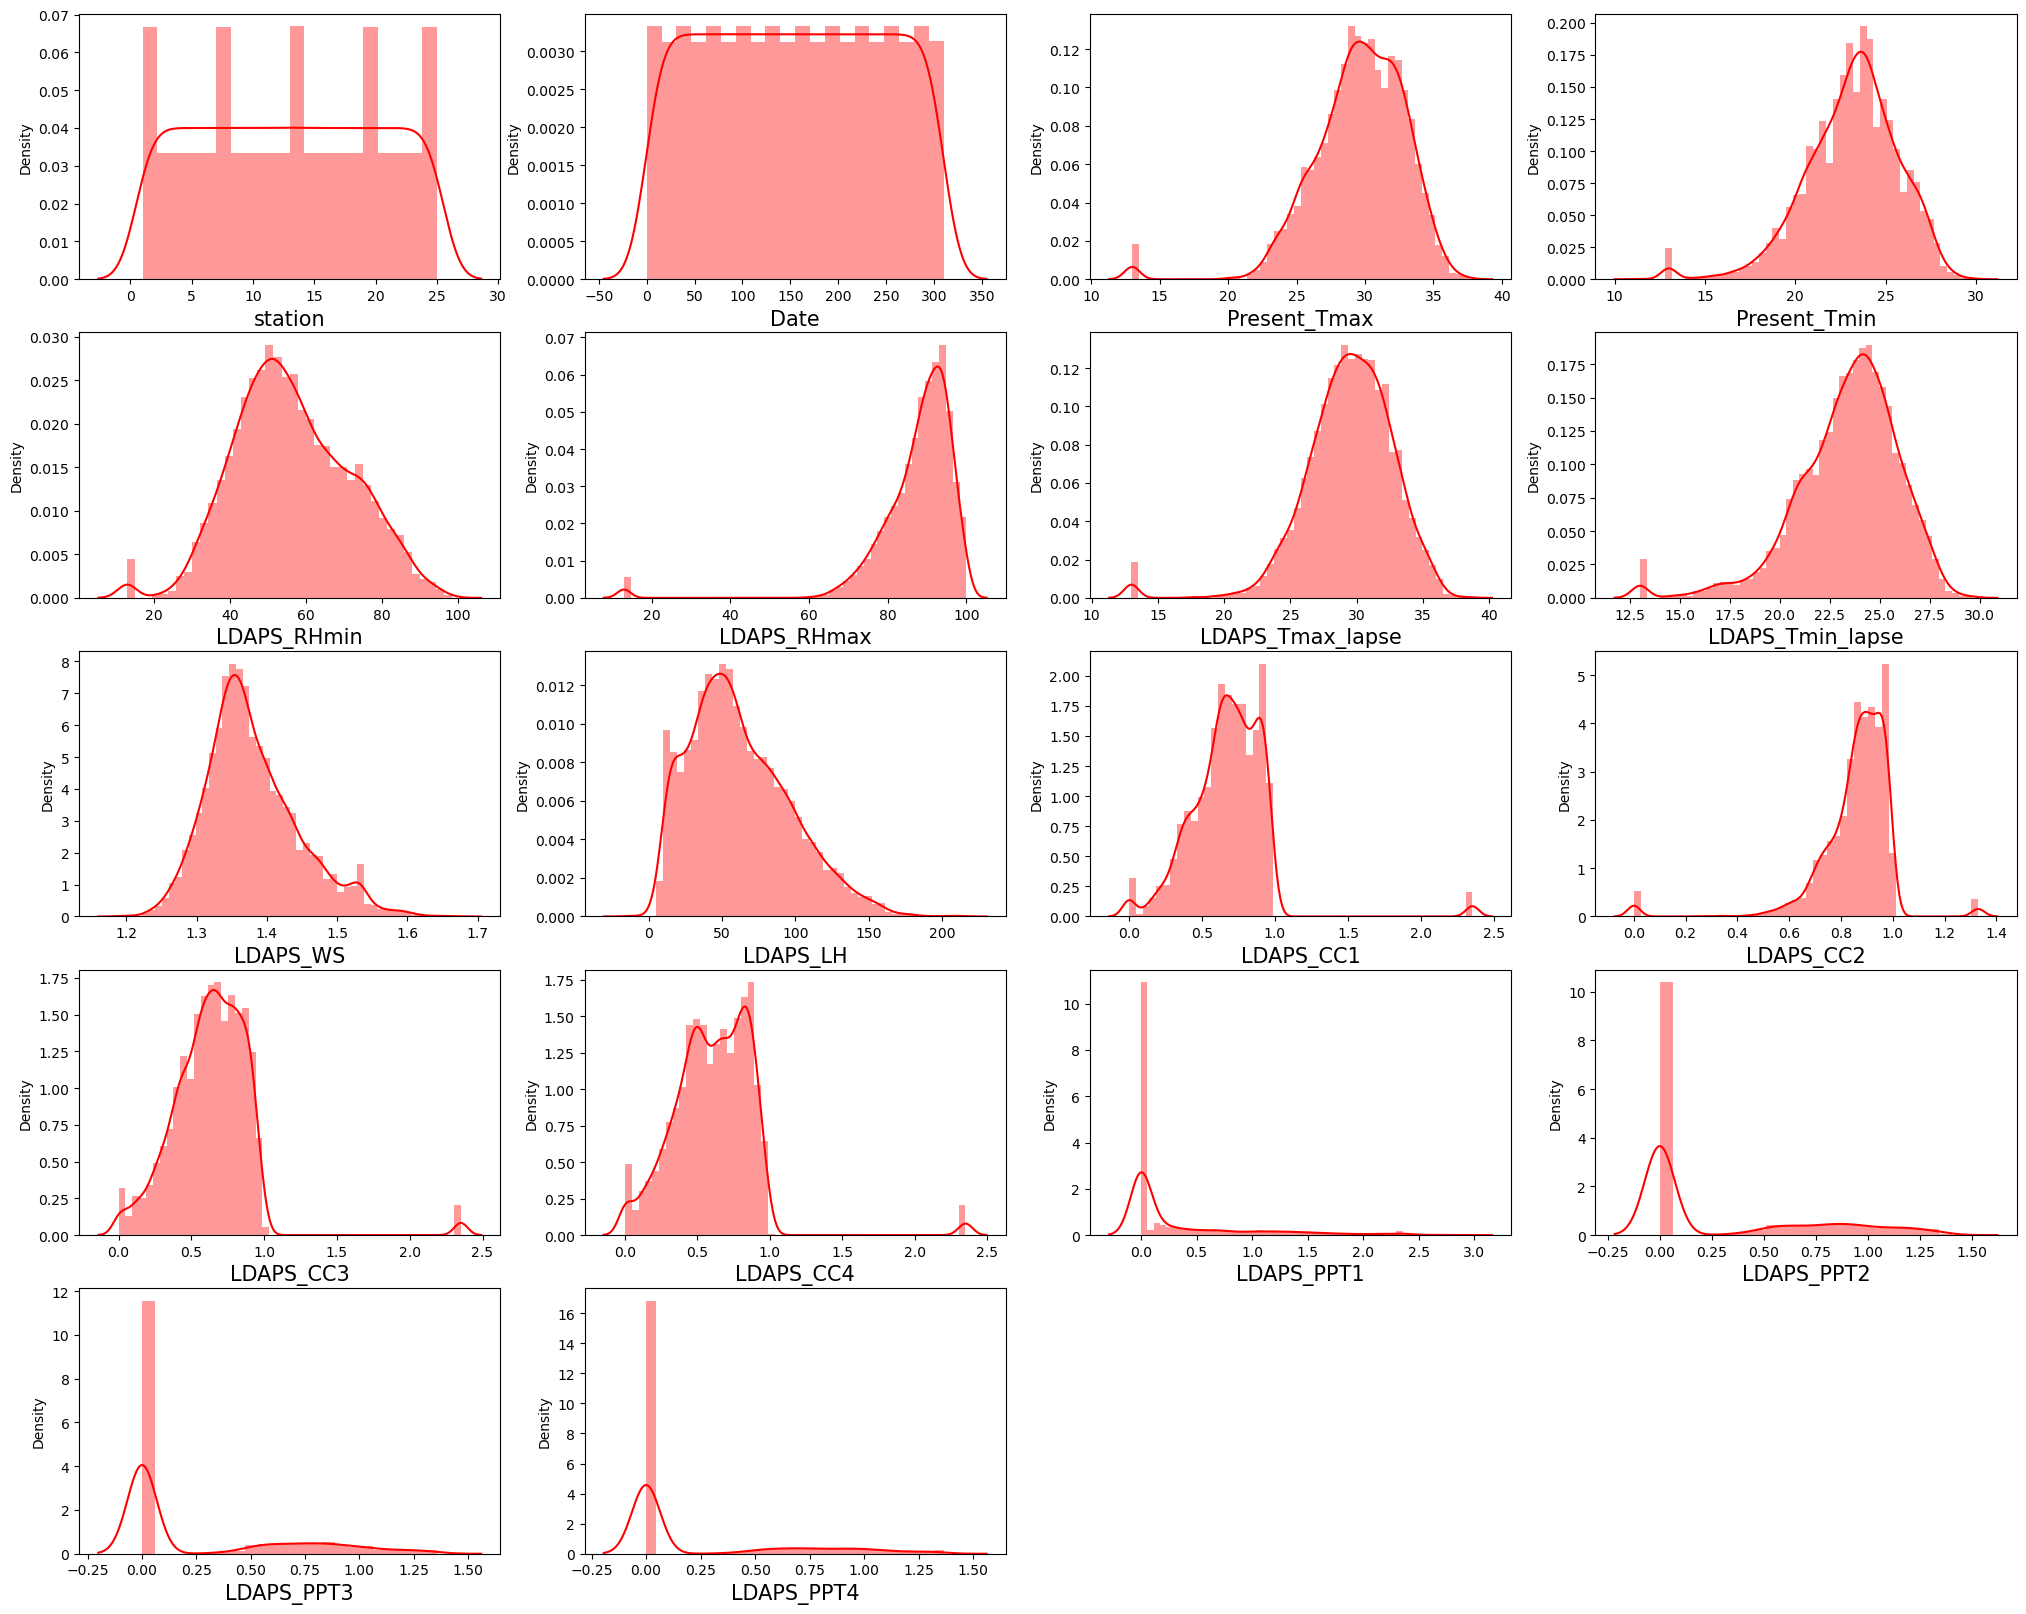

In [146]:
plt.figure(figsize=(25,20))
p=1
for i in outliers:
    if p<=18:
        ax=plt.subplot(5,4,p)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()

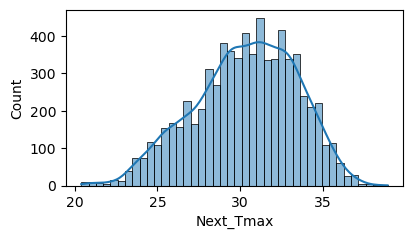

In [147]:
plt.figure(figsize=(20,16))
plt.subplot(6,4,3)
sns.histplot(df1['Next_Tmax'],kde=True)
plt.show()

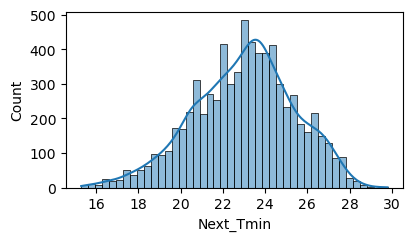

In [148]:
plt.figure(figsize=(20,16))
plt.subplot(6,4,3)
sns.histplot(df1['Next_Tmin'],kde=True)
plt.show()

In [149]:
df1_new.skew()

station            -0.003477
Date                0.017360
Present_Tmax       -0.246704
Present_Tmin       -0.260820
LDAPS_RHmin         0.273094
LDAPS_RHmax        -0.858014
LDAPS_Tmax_lapse   -0.163964
LDAPS_Tmin_lapse   -0.419824
LDAPS_WS            0.566095
LDAPS_LH            0.583622
LDAPS_CC1          -0.468838
LDAPS_CC2          -1.061623
LDAPS_CC3          -0.561615
LDAPS_CC4          -0.457484
LDAPS_PPT1          1.822852
LDAPS_PPT2          1.070543
LDAPS_PPT3          1.132682
LDAPS_PPT4          1.467968
lat                 0.100982
lon                -0.291216
DEM                 1.173449
Slope               0.882871
Solar radiation    -0.537514
Next_Tmax          -0.311448
Next_Tmin          -0.254144
dtype: float64

In [150]:
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [151]:
df1_new.skew()

station            -0.003477
Date                0.017360
Present_Tmax       -0.246704
Present_Tmin       -0.260820
LDAPS_RHmin         0.273094
LDAPS_RHmax        -0.858014
LDAPS_Tmax_lapse   -0.163964
LDAPS_Tmin_lapse   -0.419824
LDAPS_WS            0.566095
LDAPS_LH            0.583622
LDAPS_CC1          -0.468838
LDAPS_CC2          -1.061623
LDAPS_CC3          -0.561615
LDAPS_CC4          -0.457484
LDAPS_PPT1          1.822852
LDAPS_PPT2          1.070543
LDAPS_PPT3          1.132682
LDAPS_PPT4          1.467968
lat                 0.100982
lon                -0.291216
DEM                 1.173449
Slope               0.882871
Solar radiation    -0.537514
Next_Tmax          -0.311448
Next_Tmin          -0.254144
dtype: float64

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

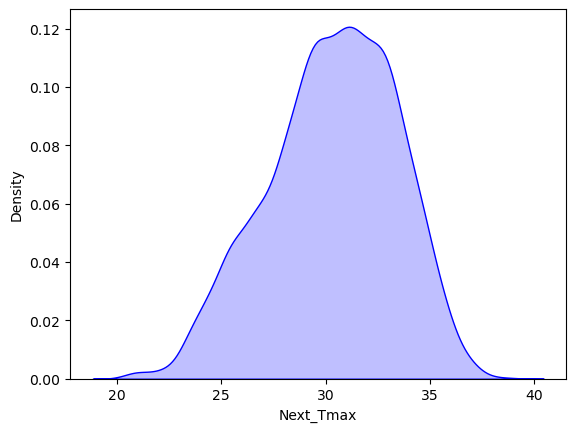

In [152]:
sns.distplot(df1_new['Next_Tmax'],color='b',kde_kws={'shade':True},hist=False)

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

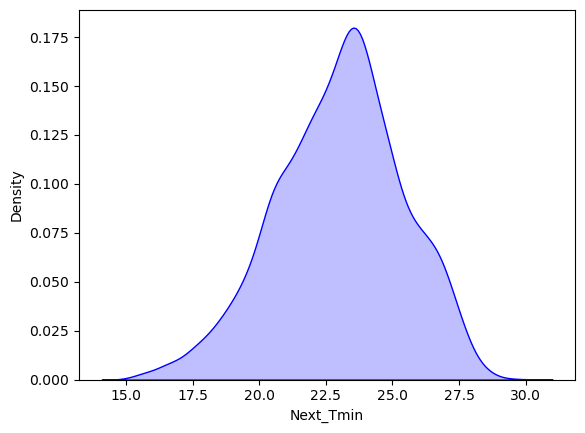

In [153]:
sns.distplot(df1_new['Next_Tmin'],color='b',kde_kws={'shade':True},hist=False)

In [154]:
df1_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.377058,69.451805,...,0.0,0.0,0.0,37.6046,126.991,14.571719,1.668832,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.336214,51.937448,...,0.0,0.0,0.0,37.6046,127.032,6.690471,0.717008,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.353133,20.573050,...,0.0,0.0,0.0,37.5776,127.058,5.771204,0.515849,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.334572,65.727144,...,0.0,0.0,0.0,37.6450,127.022,6.761361,1.592106,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.337896,107.965535,...,0.0,0.0,0.0,37.5507,127.135,5.919290,0.710985,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,1.369703,9.614074,...,0.0,0.0,0.0,37.5507,127.040,5.128158,0.756373,4456.024414,27.6,17.7
7746,22.0,304.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.339179,82.146707,...,0.0,0.0,0.0,37.5102,127.086,4.686875,0.364966,4441.803711,28.0,17.1
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.353526,72.058294,...,0.0,0.0,0.0,37.5372,126.891,3.948113,0.394208,4443.313965,28.3,18.1
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.367605,47.241457,...,0.0,0.0,0.0,37.5237,126.909,4.158798,0.471487,4438.373535,28.6,18.8


In [155]:
x=df1_new.iloc[:,0:-2]
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.377058,69.451805,...,0.507783,0.0,0.0,0.0,0.0,37.6046,126.991,14.571719,1.668832,5992.895996
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.336214,51.937448,...,0.503610,0.0,0.0,0.0,0.0,37.6046,127.032,6.690471,0.717008,5869.312500
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.353133,20.573050,...,0.521864,0.0,0.0,0.0,0.0,37.5776,127.058,5.771204,0.515849,5863.555664
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.334572,65.727144,...,0.512039,0.0,0.0,0.0,0.0,37.6450,127.022,6.761361,1.592106,5856.964844
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.337896,107.965535,...,0.553989,0.0,0.0,0.0,0.0,37.5507,127.135,5.919290,0.710985,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,1.369703,9.614074,...,0.163615,0.0,0.0,0.0,0.0,37.5507,127.040,5.128158,0.756373,4456.024414
7746,22.0,304.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.339179,82.146707,...,0.260501,0.0,0.0,0.0,0.0,37.5102,127.086,4.686875,0.364966,4441.803711
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.353526,72.058294,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,3.948113,0.394208,4443.313965
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,1.367605,47.241457,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,4.158798,0.471487,4438.373535


In [156]:
y=df1_new.iloc[:,-1]
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7218, dtype: float64

In [157]:
y1=df1_new.iloc[:,-2]
y1

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7218, dtype: float64

In [158]:
x.shape

(7218, 23)

In [159]:
y.shape

(7218,)

In [160]:
y1.shape

(7218,)

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,5.172575,station
1,5.036577,Date
2,291.824665,Present_Tmax
3,310.273769,Present_Tmin
4,104.075840,LDAPS_RHmin
5,357.172326,LDAPS_RHmax
6,780.593086,LDAPS_Tmax_lapse
7,810.237751,LDAPS_Tmin_lapse
8,623.275342,LDAPS_WS
9,6.517457,LDAPS_LH


From the above VIF values we can see that features like lat,lon,LDAPS_CC1,LDAPS_CC2,LDAPS_Tmin_lapse,LDAPS_Tmax_lapse are showing high correlation, so it is better to drop all these columns for further process.

In [162]:
df1_new.drop(['lat','lon','LDAPS_CC2','LDAPS_CC1','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse'],axis=1,inplace=True)

In [163]:
df1_new

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,1.377058,69.451805,0.544796,0.507783,0.0,0.0,0.0,0.0,14.571719,1.668832,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,1.336214,51.937448,0.542254,0.503610,0.0,0.0,0.0,0.0,6.690471,0.717008,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,1.353133,20.573050,0.588764,0.521864,0.0,0.0,0.0,0.0,5.771204,0.515849,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,1.334572,65.727144,0.544189,0.512039,0.0,0.0,0.0,0.0,6.761361,1.592106,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,1.337896,107.965535,0.563461,0.553989,0.0,0.0,0.0,0.0,5.919290,0.710985,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304.0,23.1,17.8,24.688997,78.261383,1.369703,9.614074,0.000000,0.163615,0.0,0.0,0.0,0.0,5.128158,0.756373,4456.024414,27.6,17.7
7746,22.0,304.0,22.5,17.4,30.094858,83.690018,1.339179,82.146707,0.008363,0.260501,0.0,0.0,0.0,0.0,4.686875,0.364966,4441.803711,28.0,17.1
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,1.353526,72.058294,0.000000,0.000000,0.0,0.0,0.0,0.0,3.948113,0.394208,4443.313965,28.3,18.1
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,1.367605,47.241457,0.000000,0.000000,0.0,0.0,0.0,0.0,4.158798,0.471487,4438.373535,28.6,18.8


In [164]:
x1=df1_new.iloc[:,0:-2]
x1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
0,1.0,290.0,28.7,21.4,58.255688,91.116364,1.377058,69.451805,0.544796,0.507783,0.0,0.0,0.0,0.0,14.571719,1.668832,5992.895996
1,2.0,290.0,31.9,21.6,52.263397,90.604721,1.336214,51.937448,0.542254,0.503610,0.0,0.0,0.0,0.0,6.690471,0.717008,5869.312500
2,3.0,290.0,31.6,23.3,48.690479,83.973587,1.353133,20.573050,0.588764,0.521864,0.0,0.0,0.0,0.0,5.771204,0.515849,5863.555664
3,4.0,290.0,32.0,23.4,58.239788,96.483688,1.334572,65.727144,0.544189,0.512039,0.0,0.0,0.0,0.0,6.761361,1.592106,5856.964844
4,5.0,290.0,31.4,21.9,56.174095,90.155128,1.337896,107.965535,0.563461,0.553989,0.0,0.0,0.0,0.0,5.919290,0.710985,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,304.0,23.1,17.8,24.688997,78.261383,1.369703,9.614074,0.000000,0.163615,0.0,0.0,0.0,0.0,5.128158,0.756373,4456.024414
7746,22.0,304.0,22.5,17.4,30.094858,83.690018,1.339179,82.146707,0.008363,0.260501,0.0,0.0,0.0,0.0,4.686875,0.364966,4441.803711
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,1.353526,72.058294,0.000000,0.000000,0.0,0.0,0.0,0.0,3.948113,0.394208,4443.313965
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,1.367605,47.241457,0.000000,0.000000,0.0,0.0,0.0,0.0,4.158798,0.471487,4438.373535


In [165]:
y1=df1_new.iloc[:,-1]
y1

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7218, dtype: float64

In [166]:
y1new=df1_new.iloc[:,-2]
y1new

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7218, dtype: float64

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [168]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=42)

In [169]:
x1_train.shape

(5052, 17)

In [170]:
x1_test.shape

(2166, 17)

In [171]:
y1_train.shape

(5052,)

In [172]:
y1_test.shape

(2166,)

In [173]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1_train,y1_train)
pred_lr=lr.predict(x1_test)
pred_lr

array([22.6087524 , 23.90600673, 24.68896231, ..., 22.27595288,
       23.25374406, 22.31047944])

In [174]:
print('r2 score:',r2_score(y1_test,pred_lr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_lr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_lr)))

r2 score: 0.6809119363018042
mean_squared_error: 1.782189381419501
root mean_squared_error: 1.3349866596410247


In [175]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
pred_rfr=rfr.predict(x1_test)
pred_rfr

array([22.543, 23.066, 24.994, ..., 23.127, 20.864, 21.954])

In [176]:
print('r2 score:',r2_score(y1_test,pred_rfr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_rfr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_rfr)))

r2 score: 0.8751387156310823
mean_squared_error: 0.697382573868883
root mean_squared_error: 0.8350943502795855


In [177]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x1_train,y1_train)
pred_knn=knn.predict(x1_test)
pred_knn

array([22.52, 23.2 , 23.32, ..., 22.94, 22.54, 23.4 ])

In [178]:
print('r2 score:',r2_score(y1_test,pred_knn))
print('mean_squared_error:', mean_squared_error(y1_test,pred_knn))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_knn)))

r2 score: 0.5436750836797656
mean_squared_error: 2.54869270544783
root mean_squared_error: 1.5964625599893754


In [179]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x1_train,y1_train)
pred_ls=ls.predict(x1_test)
pred_ls

array([22.88049718, 23.54833332, 24.3005506 , ..., 22.4357026 ,
       23.67287905, 22.37237598])

In [180]:
print('r2 score:',r2_score(y1_test,pred_ls))
print('mean_squared_error:', mean_squared_error(y1_test,pred_ls))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_ls)))

r2 score: 0.6241527986194473
mean_squared_error: 2.0992038485344486
root mean_squared_error: 1.4488629502249164


In [181]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x1_train,y1_train)
pred_rdg=rdg.predict(x1_test)
pred_rdg

array([22.60523006, 23.90553078, 24.68794868, ..., 22.27435396,
       23.25877458, 22.30964997])

In [182]:
print('r2 score:',r2_score(y1_test,pred_rdg))
print('mean_squared_error:', mean_squared_error(y1_test,pred_rdg))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_rdg)))

r2 score: 0.6809619707700483
mean_squared_error: 1.7819099259708202
root mean_squared_error: 1.3348819895297188


In [183]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
pred_dtr=dtr.predict(x1_test)
pred_dtr

array([22.9, 22.1, 24.8, ..., 23.3, 19.6, 21.6])

In [184]:
print('r2 score:',r2_score(y1_test,pred_dtr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_dtr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_dtr)))

r2 score: 0.7091977294241781
mean_squared_error: 1.6242059095106187
root mean_squared_error: 1.2744433724221014


In [185]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x1_train,y1_train)
pred_etr=etr.predict(x1_test)
pred_etr

array([22.587, 23.407, 25.203, ..., 23.256, 20.715, 21.905])

In [186]:
print('r2 score:',r2_score(y1_test,pred_etr))
print('mean_squared_error:', mean_squared_error(y1_test,pred_etr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1_test,pred_etr)))

r2 score: 0.8849990859146029
mean_squared_error: 0.6423098550323175
root mean_squared_error: 0.8014423591452585


From the above model fitting and performance score, we can say that, ExtraTreeRegressor is the best fitting and best performing models,which is giving a performance score as 88.96.

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_lr,y1_test)) - (score.mean()*100))

[0.72011452 0.65925525 0.79243071 0.84063733 0.86496364]
0.7754802910281089
Difference between r2 score and cross validation score is- -77.02084826158692


In [189]:
score1= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_rfr,y1_test)) - (score1.mean()*100))

[-0.0487054  -0.54328748  0.13668526  0.28352347  0.40728833]
0.047100835225425144
Difference between r2 score and cross validation score is- -3.8712598507027556


In [190]:
score2= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_knn,y1_test)) - (score2.mean()*100))

[-0.0487054  -0.54328748  0.13668526  0.28352347  0.40728833]
0.047100835225425144
Difference between r2 score and cross validation score is- -4.500710748184155


In [191]:
score3= cross_val_score(ls,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_ls,y1_test)) - (score3.mean()*100))

[0.68908116 0.59762968 0.73230173 0.74837024 0.83032399]
0.7195413588629209
Difference between r2 score and cross validation score is- -71.90563564983377


In [192]:
score4= cross_val_score(rdg,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_rdg,y1_test)) - (score4.mean()*100))

[0.72015561 0.65909327 0.79326766 0.84188528 0.86541906]
0.7759641755690152
Difference between r2 score and cross validation score is- -77.0692854659647


In [193]:
score5= cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_dtr,y1_test)) - (score5.mean()*100))

[0.28634954 0.42551416 0.5835564  0.68615944 0.7331404 ]
0.542943988738426
Difference between r2 score and cross validation score is- -53.5885436482907


In [194]:
score6= cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_etr,y1_test)) - (score6.mean()*100))

[0.69306407 0.68833632 0.79950411 0.85166504 0.8803776 ]
0.7825894270730764
Difference between r2 score and cross validation score is- -77.40590605513943


In [195]:
import pickle

In [196]:
filename='Min-Temperature forecast.pkl'
pickle.dump(etr,open('Min-Temperature forecast.pkl','wb'))


In [197]:
loaded_model1=pickle.load(open('Min-Temperature forecast.pkl','rb'))
result=loaded_model1.score(x1_test,y1_test)
print(result*100)

88.49990859146028


In [198]:
conclusion=pd.DataFrame([loaded_model1.predict(x1_test)[:],(y1_test)[0:1]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165
Predicted,22.587,23.407,25.203,23.275,24.251,20.59,21.562,23.861,21.147,23.051,...,20.43,27.054,22.508,23.78,22.185,24.854,20.975,23.256,20.715,21.905
Original,22.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
def pred_etr(p):
    p=p.reshape(1,-1)
    pred=etr.predict(p)
    print('Response type',pred)

In [200]:
p=np.array([22.0,289.0,24.4,19.1,45.396980,80.306244,1.288234,64.005402,0.921297,0.803192,0.0,0.0,0.0,0.0,2.164919,0.604124,4481.518555])
pred_etr(p)

Response type [17.612]


Now we will check try to fit the model with 2nd target as Next_Tmax

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [202]:
x1_train,x1_test,y1new_train,y1new_test=train_test_split(x1,y1,test_size=.30,random_state=42)

In [203]:
x1_train.shape

(5052, 17)

In [204]:
x1_test.shape

(2166, 17)

In [205]:
y1new_train.shape

(5052,)

In [206]:
y1new_test.shape

(2166,)

In [207]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x1_train,y1new_train)
pred_lr=lr.predict(x1_test)
pred_lr

array([22.6087524 , 23.90600673, 24.68896231, ..., 22.27595288,
       23.25374406, 22.31047944])

In [208]:
print('r2 score:',r2_score(y1new_test,pred_lr))
print('mean_squared_error:', mean_squared_error(y1new_test,pred_lr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1new_test,pred_lr)))

r2 score: 0.6809119363018042
mean_squared_error: 1.782189381419501
root mean_squared_error: 1.3349866596410247


In [209]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1new_train)
pred_rfr=rfr.predict(x1_test)
pred_rfr

array([22.52 , 23.288, 24.97 , ..., 23.245, 20.873, 21.944])

In [210]:
print('r2 score:',r2_score(y1new_test,pred_rfr))
print('mean_squared_error:', mean_squared_error(y1new_test,pred_rfr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1new_test,pred_rfr)))

r2 score: 0.876352446010746
mean_squared_error: 0.6906035757156054
root mean_squared_error: 0.8310256167625673


In [211]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x1_train,y1new_train)
pred_knn=knn.predict(x1_test)
pred_knn

array([22.52, 23.2 , 23.32, ..., 22.94, 22.54, 23.4 ])

In [212]:
print('r2 score:',r2_score(y1new_test,pred_knn))
print('mean_squared_error:', mean_squared_error(y1new_test,pred_knn))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1new_test,pred_knn)))

r2 score: 0.5436750836797656
mean_squared_error: 2.54869270544783
root mean_squared_error: 1.5964625599893754


In [213]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x1_train,y1new_train)
pred_ls=ls.predict(x1_test)
pred_ls

array([22.88049718, 23.54833332, 24.3005506 , ..., 22.4357026 ,
       23.67287905, 22.37237598])

In [214]:
print('r2 score:',r2_score(y1new_test,pred_ls))
print('mean_squared_error:', mean_squared_error(y1new_test,pred_ls))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1new_test,pred_ls)))

r2 score: 0.6241527986194473
mean_squared_error: 2.0992038485344486
root mean_squared_error: 1.4488629502249164


In [215]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x1_train,y1new_train)
pred_rdg=rdg.predict(x1_test)
pred_rdg

array([22.60523006, 23.90553078, 24.68794868, ..., 22.27435396,
       23.25877458, 22.30964997])

In [216]:
print('r2 score:',r2_score(y1new_test,pred_rdg))
print('mean_squared_error:', mean_squared_error(y1new_test,pred_rdg))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1new_test,pred_rdg)))

r2 score: 0.6809619707700483
mean_squared_error: 1.7819099259708202
root mean_squared_error: 1.3348819895297188


In [217]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1new_train)
pred_dtr=dtr.predict(x1_test)
pred_dtr

array([22.9, 23.2, 25. , ..., 23.4, 20.4, 21.7])

In [218]:
print('r2 score:',r2_score(y1new_test,pred_dtr))
print('mean_squared_error:', mean_squared_error(y1new_test,pred_dtr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1new_test,pred_dtr)))

r2 score: 0.7130993070602922
mean_squared_error: 1.60241458910434
root mean_squared_error: 1.2658651543921808


In [219]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x1_train,y1new_train)
pred_etr=etr.predict(x1_test)
pred_etr

array([22.619, 23.474, 25.308, ..., 23.27 , 21.077, 21.936])

In [220]:
print('r2 score:',r2_score(y1new_test,pred_etr))
print('mean_squared_error:', mean_squared_error(y1new_test,pred_etr))
print('root mean_squared_error:',np.sqrt(mean_squared_error(y1new_test,pred_etr)))

r2 score: 0.8844275462038442
mean_squared_error: 0.6455020521698988
root mean_squared_error: 0.8034314234394239


From the above model fitting and performance score, we can say that, ExtraTreeRegressor is the best fitting and best performing models,which is giving a performance score as 88.79.

In [221]:
from sklearn.model_selection import cross_val_score

In [222]:
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_lr,y1new_test)) - (score.mean()*100))

[0.72011452 0.65925525 0.79243071 0.84063733 0.86496364]
0.7754802910281089
Difference between r2 score and cross validation score is- -77.02084826158692


In [223]:
score1= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_rfr,y1new_test)) - (score1.mean()*100))

[-0.0487054  -0.54328748  0.13668526  0.28352347  0.40728833]
0.047100835225425144
Difference between r2 score and cross validation score is- -3.8691803126965545


In [224]:
score2= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_knn,y1new_test)) - (score2.mean()*100))

[-0.0487054  -0.54328748  0.13668526  0.28352347  0.40728833]
0.047100835225425144
Difference between r2 score and cross validation score is- -4.500710748184155


In [225]:
score3= cross_val_score(ls,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_ls,y1new_test)) - (score3.mean()*100))

[0.68908116 0.59762968 0.73230173 0.74837024 0.83032399]
0.7195413588629209
Difference between r2 score and cross validation score is- -71.90563564983377


In [226]:
score4= cross_val_score(rdg,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_rdg,y1new_test)) - (score4.mean()*100))

[0.72015561 0.65909327 0.79326766 0.84188528 0.86541906]
0.7759641755690152
Difference between r2 score and cross validation score is- -77.0692854659647


In [227]:
score5= cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_dtr,y1new_test)) - (score5.mean()*100))

[0.29896562 0.428537   0.60818188 0.69291627 0.73335667]
0.5523914870685166
Difference between r2 score and cross validation score is- -54.52828941520578


In [228]:
score6= cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('Difference between r2 score and cross validation score is-',(r2_score(pred_etr,y1new_test)) - (score6.mean()*100))

[0.69964224 0.68886538 0.79943805 0.85157695 0.87859198]
0.783622919785587
Difference between r2 score and cross validation score is- -77.51064748298514


In [229]:
import pickle

In [230]:
filename='Max-Temperature forecast.pkl'
pickle.dump(etr,open('Max-Temperature forecast.pkl','wb'))


In [231]:
loaded_model2=pickle.load(open('Max-Temperature forecast.pkl','rb'))
result2=loaded_model2.score(x1_test,y1new_test)
print(result*100)

88.49990859146028


In [232]:
conclusion=pd.DataFrame([loaded_model2.predict(x1_test)[:],(y1new_test)[0:1]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165
Predicted,22.619,23.474,25.308,22.841,24.264,20.573,21.429,23.919,21.196,22.882,...,20.43,27.069,22.45,23.822,22.244,24.712,20.697,23.27,21.077,21.936
Original,22.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
def pred_etr(p):
    p=p.reshape(1,-1)
    pred=etr.predict(p)
    print('Response type',pred)

In [234]:
pmax=np.array([22.0,289.0,24.4,19.1,45.396980,80.306244,1.288234,64.005402,0.921297,0.803192,0.0,0.0,0.0,0.0,2.164919,0.604124,4481.518555])
pred_etr(pmax)

Response type [17.453]
